# 📈📝<code style="background:lightgreen;color:black"> LENDING CLUB CASE STUDY </code>📊📉

***

In [1]:
#Importing the necessary libraries

#For Numerical and Data analysis
import numpy as np
import pandas as pd

#For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#To suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Loading the data into a dataframe named loan_df
loan_df = pd.read_csv('loan.csv') 

## 📋<code style="background:lightyellow;color:black">Brief Summary of the Data </code>

In [3]:
#Finding the shape of the data
loan_df.shape

(39717, 111)

In [4]:
#Statistical summary of the Numerical columns of the data
loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [5]:
#Summary of the Categorical columns of the data
loan_df.describe(include='O')

term int_rate  grade sub_grade emp_title emp_length  \
count        39717    39717  39717     39717     37258      38642   
unique           2      371      7        35     28820         11   
top      36 months   10.99%      B        B3   US Army  10+ years   
freq         29096      956  12020      2917       134       8879   

       home_ownership verification_status issue_d loan_status  ...  \
count           39717               39717   39717       39717  ...   
unique              5                   3      55           3  ...   
top              RENT        Not Verified  Dec-11  Fully Paid  ...   
freq            18899               16921    2260       32950  ...   

                     title zip_code addr_state earliest_cr_line revol_util  \
count                39706    39717      39717            39717      39667   
unique               19615      823         50              526       1089   
top     Debt Consolidation    100xx         CA           Nov-98         0%   
freq                  2184      597       7099              370        977   

       initial_list_status last_pymnt_d next_pymnt_d last_credit_pull_d  \
count                39717        39646         1140              39715   
unique                   1          101            2                106   
top                      f       May-16       Jun-16             May-16   
freq                 39717         1256         1125              10308   

       application_type  
count             39717  
unique                1  
top          INDIVIDUAL  
freq              39717  

[4 rows x 24 columns]

<div class="alert alert-block alert-success">
    <b>Observation: There are 39717 rows and 111 columns in the data. Out of 111 columns, 87 are Numerical and 24 are Categorical.</b>
</div>

## 🏷️<code style="background:lightyellow;color:black">1. Data cleaning and handling </code>

### ✏️ <code style="background:lightcyan;color:black"> 1.1 Checking if there are any header/footer/summary rows present and deleting them if found </code>

In [6]:
#Checking the top 5 records of the data
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [7]:
#Checking the bottom 5 records of the data
loan_df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN            NaN               NaN   
39713                NaN            NaN               NaN   
39714                NaN            NaN               NaN   
39715                NaN            NaN               NaN   
39716                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39716            NaN                        NaN  

[5 rows x 111 columns]

<div class="alert alert-block alert-success">
    <b>Observation:</br> After checking the top 5 & bottom 5 records, it is found that the header/footer or summary rows (e.g. Total or Sub-total rows) are not present.</b>
</div>

In [8]:
#Checking if there are any redundant values in the "loan_status" field (target variable)
loan_df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [9]:
"""Since loan_status = 'Current' signifies that the loan tenure is not yet completed and the applicant is still paying the 
   installments, so the records associated with them are redundant. Therefore, removing those records:"""

loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]

print("The number of rows available (after deletion of rows associated with loan_status = 'Current') are", loan_df.shape[0])

The number of rows available (after deletion of rows associated with loan_status = 'Current') are 38577


In [10]:
#Checking if there are any duplicate rows
duplicate_rows_count = len(loan_df[loan_df.duplicated()])
print("Duplicate rows count =", round(duplicate_rows_count))

Duplicate rows count = 0


### ✏️ <code style="background:lightcyan;color:black">1.2 Removing the unnecessary Fields (Columns)</code>

In [11]:
#Present shape
loan_df.shape

(38577, 111)

In [12]:
#Finding the percentage of missing values in each column
100 * (loan_df.isnull().sum()/len(loan_df))

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [13]:
#Forming a list of columns having 100% Null Values 
Null_columns_list = loan_df.columns[(100 * (loan_df.isnull().sum()/len(loan_df))) == 100].tolist()
print("Null_columns_list: \n\n", Null_columns_list)

Null_columns_list: 

 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 't

In [14]:
#Count of 100% Null values list
print(f'There are {len(Null_columns_list)} columns in the data having 100% Null values')

There are 55 columns in the data having 100% Null values


In [15]:
#Dropping those fields having 100% Null Values
loan_df = loan_df.drop(Null_columns_list, axis=1)

#checking the shape again after dropping 55 columns (100% Null columns)
loan_df.shape

(38577, 56)

In [16]:
#Checking the percentage of missing values after the above drop operation
100 * (loan_df.isnull().sum()/len(loan_df))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.185033
emp_length                     2.677761
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.472717
purpose                        0.000000
title                          0.028514
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [17]:
#Finding the columns having more than 30% Null values
Null_columns_more_than_30 = loan_df.columns[(100 * (loan_df.isnull().sum()/len(loan_df))) > 30].tolist()

#As per industry practice, dropping the fields having more than 30% Null Values
loan_df = loan_df.drop(Null_columns_more_than_30, axis=1)

#Checking the shape for confirmation (after the above operation, we will be having 53 columns)
loan_df.shape

(38577, 53)

In [18]:
#Dropping the rows where all the columns' values as NULL.
loan_df.dropna(how="all", inplace=True)
loan_df.shape

(38577, 53)

<div class="alert alert-block alert-success">
    <b>Observation:There were no such rows with all the column values as NULL; therefore the shape remains same even after the dropna operation.</b>
</div>

In [19]:
#Checking the number of unique values in top 15 sorted columns (sorted from lower to higher values)
loan_df.nunique().sort_values().head(15)

tax_liens                     1
initial_list_status           1
out_prncp                     1
out_prncp_inv                 1
collections_12_mths_ex_med    1
policy_code                   1
pymnt_plan                    1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
loan_status                   2
term                          2
verification_status           3
pub_rec_bankruptcies          3
dtype: int64

In [20]:
#creating a list of fields having only 1 unique value
one_unique_value_list = loan_df.columns[loan_df.nunique() == 1]

#Dropping the fields having only one unique value
loan_df = loan_df.drop(one_unique_value_list, axis=1)

#Checking the shape (there will be reduction of number of columns by 11)
loan_df.shape

(38577, 42)

In [21]:
#Finding the list of columns having 100% unique values
fully_unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
print(f'Fully unique columns list: {fully_unique_columns}')

Fully unique columns list: ['id', 'member_id', 'url']


In [22]:
#Dropping the fields 'member_id' and 'url' as they will not contribute to this EDA analysis.
loan_df = loan_df.drop(['member_id', 'url'], axis=1)

#Checking the shape for confirmation
loan_df.shape

(38577, 40)

In [23]:
''' Behavioural columns are populated after the approval of any loan application and hence their data will not be available
    during the loan approval process. Hence these fields are redundant for analysis. So dropping these fields: '''

#Creating the behavioural columns list out of the 40 available columns
behavioural_columns_list=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 
                  'revol_bal', 'revol_util', 'total_acc', 'total_pymnt','total_pymnt_inv', 
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                  'last_pymnt_d','last_credit_pull_d']

#Dropping the behavioural columns for ease of analysis
loan_df=loan_df.drop(behavioural_columns_list,axis=1)

#Checking the shape for confirmation (there will be reduction of number of columns by 18)
loan_df.shape

(38577, 22)

In [24]:
#Checking the number of unique values for the fields 'title' and 'emp_title'.
print(f'''No of unique values in fields -> 'title' is {loan_df.title.nunique()}
                              -> 'emp_title' is {loan_df.emp_title.nunique()}''')

No of unique values in fields -> 'title' is 19297
                              -> 'emp_title' is 28027


In [25]:
''' 1) We will restrict our analysis till Group level as far as the 'grading of loans' is concerned. Hence, we will keep
       the 'grade' column only and not the 'sub_grade' column. Hence dropping the 'sub_grade' column.
    
    2) We will also drop the columns namely 'title' and 'emp_title', which are having so many unique string values, as they 
       wont contribute to this EDA analysis. '''

loan_df = loan_df.drop(['sub_grade','title','emp_title'],  axis=1)

#Checking the resulting shape
loan_df.shape

(38577, 19)

## 🏷️<code style="background:lightyellow;color:black">2. Data Conversion</code>

In [26]:
#Checking the datatypes of all the available columns
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [27]:
#Count of values present in column 'term'
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [28]:
#Converting the datatype of column 'term' from object to integer 
loan_df.term = loan_df.term.apply(lambda x: int(x.rstrip(" months")))

In [29]:
#Checking the values of column 'term' for confirmation
loan_df.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [30]:
#Checking the data type of column 'term' for confirmation
loan_df.term.dtype

dtype('int64')

In [31]:
#Converting the datatype of column 'int_rate' from object to float
loan_df["int_rate"] = loan_df["int_rate"].apply(lambda x: float(x.rstrip("%")))

#Checking the data type of column 'int_rate' for confirmation
loan_df["int_rate"].dtype

dtype('float64')

In [32]:
#Converting the datatype of column 'loan_amnt' from int to float
loan_df['loan_amnt'] = loan_df['loan_amnt'].astype('float')
#Checking the datatype of loan_amnt column
print(f"The datatype of 'loan_amnt' column is {loan_df['loan_amnt'].dtype}")

#Converting the datatype of column 'funded_amnt' from int to float
loan_df['funded_amnt'] = loan_df['funded_amnt'].astype('float')
#Checking the datatype of loan_amnt column
print(f"The datatype of 'funded_amnt' column is {loan_df['funded_amnt'].dtype}")

The datatype of 'loan_amnt' column is float64
The datatype of 'funded_amnt' column is float64


In [33]:
#Converting the datatype of field 'issue_d' from object to datetime
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')

#Confirming the datatype of the column (evident from "dtype: datetime64[ns]" part on the output)
loan_df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

## 🏷️<code style="background:lightyellow;color:black">3. Treating the missing values</code>

In [34]:
#Checking the percentage of missing values in each field
100 * (loan_df.isnull().sum()/len(loan_df))

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [35]:
""""
    Since, we know that, if we have columns where less than 5% of rows have missing values, then in such cases, we can 
    drop those rows. Here, 'emp_length' and 'pub_rec_bankruptcies' are such columns. Hence, we are going with the below 
    operation which will do the needful, by deleting those records.

"""

#Removing the records where there are any columns having Null values
loan_df = loan_df.dropna(how = 'any')

#Checking the shape post the above operation
loan_df.shape

(36847, 19)

In [36]:
#Confirming that there are no missing values in any column, by again finding the % of missing values
100 * (loan_df.isnull().sum()/len(loan_df))

id                      0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

## 🏷️<code style="background:lightyellow;color:black"> 4. Derived Metrics</code>

In [37]:
#Forming the Year and Month column out of the 'issue_d' column
loan_df["issue_year"] = pd.DatetimeIndex(loan_df["issue_d"]).year
loan_df["issue_month"] = pd.DatetimeIndex(loan_df["issue_d"]).month

In [38]:
#Displaying the top 5 records for confirmation of availability of 2 derived metrics (added towards the right end)
#Also, the column numbers will be 21 instead of 19
loan_df.head() 

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501     5000.0       5000.0           4975.0    36     10.65   
1  1077430     2500.0       2500.0           2500.0    60     15.27   
2  1077175     2400.0       2400.0           2400.0    36     15.96   
3  1076863    10000.0      10000.0          10000.0    36     13.49   
5  1075269     5000.0       5000.0           5000.0    36      7.90   

   installment grade emp_length home_ownership  ...  verification_status  \
0       162.87     B  10+ years           RENT  ...             Verified   
1        59.83     C   < 1 year           RENT  ...      Source Verified   
2        84.33     C  10+ years           RENT  ...         Not Verified   
3       339.31     C  10+ years           RENT  ...      Source Verified   
5       156.46     A    3 years           RENT  ...      Source Verified   

     issue_d  loan_status         purpose zip_code addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card    860xx         AZ  27.65   
1 2011-12-01  Charged Off             car    309xx         GA   1.00   
2 2011-12-01   Fully Paid  small_business    606xx         IL   8.72   
3 2011-12-01   Fully Paid           other    917xx         CA  20.00   
5 2011-12-01   Fully Paid         wedding    852xx         AZ  11.20   

   pub_rec_bankruptcies  issue_year  issue_month  
0                   0.0        2011           12  
1                   0.0        2011           12  
2                   0.0        2011           12  
3                   0.0        2011           12  
5                   0.0        2011           12  

[5 rows x 21 columns]

---

## 📌 <code style="background:lightyellow;color:black">Univariate Analysis</code> 📊

### ✏️ <code style="background:lightcyan;color:black">1.1 Univariate Analysis on Numeric columns</code>

**`Plotting the box plot of Numerical columns with outliers`**

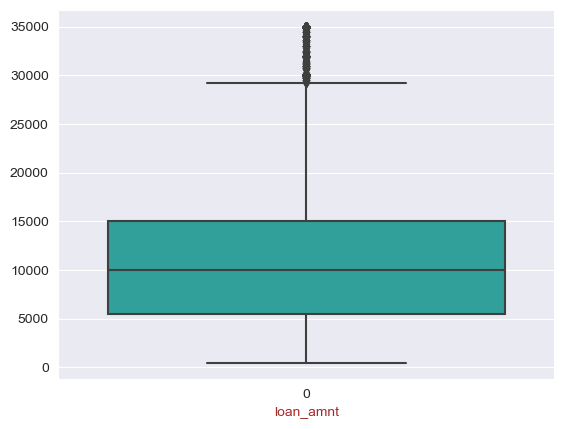

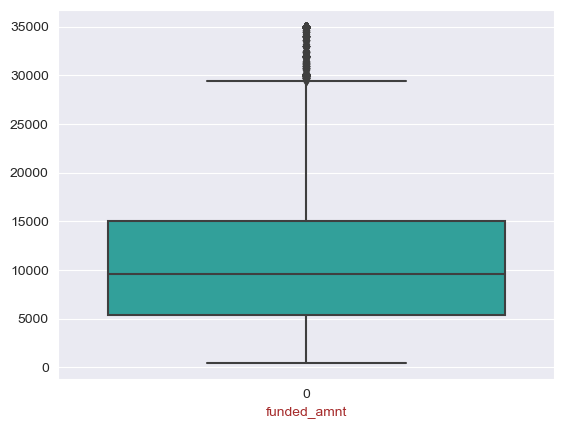

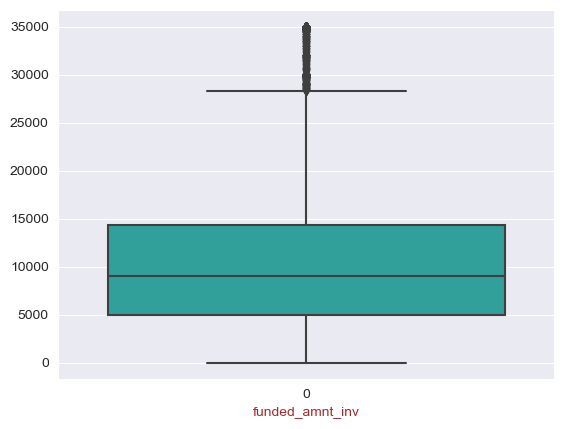

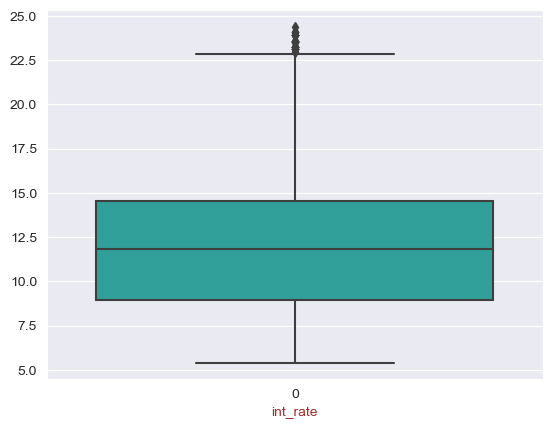

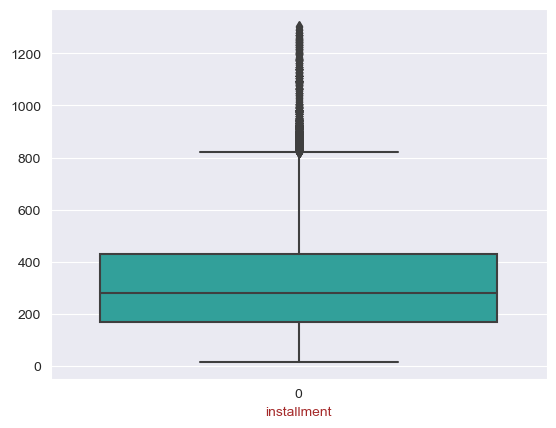

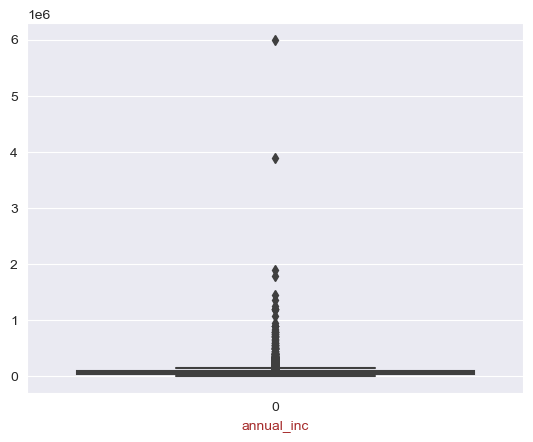

In [39]:
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

for column in numerical_columns:
    with sns.axes_style("darkgrid"):
        sns.boxplot(loan_df[column], color='lightseagreen')
        plt.xlabel(column, color="brown")
        plt.show()

In [40]:
#Shape of the dataframe before removal of outliers
loan_df.shape

(36847, 21)

In [41]:
""" 
    After observing the above box plots, we can find that there are outliers present in fields 'loan_amnt', 'funded_amnt',
    'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'. So, removing the outliers for the ease of analysis. 
                                                                                                                        """

outliers_columns_list = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

#Defining a function to remove outliers based on IQR (i.e. removal of outliers beyond fences)
def remove_outliers_iqr_based(df,columns):
    for col in columns:
        Q1 = np.quantile(df[col],0.25)
        Q3 = np.quantile(df[col],0.75)
        IQR = Q3 - Q1
        lower_fence_value = Q1 - (1.5 * IQR)
        upper_fence_value = Q3 + (1.5 * IQR)
        df = df[(df[col] >= lower_fence_value) & (df[col] <= upper_fence_value)]
    return df

#Removal of outliers from those fields
loan_df = remove_outliers_iqr_based(loan_df, outliers_columns_list)

In [42]:
#Shape of the dataframe after removal of outliers from the above 6 numerical columns 
loan_df.shape 

(33191, 21)

**`Plotting the box plot of Numerical columns after removal of outliers`**

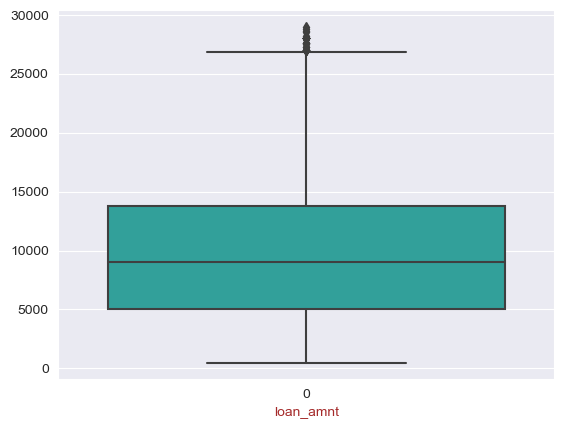

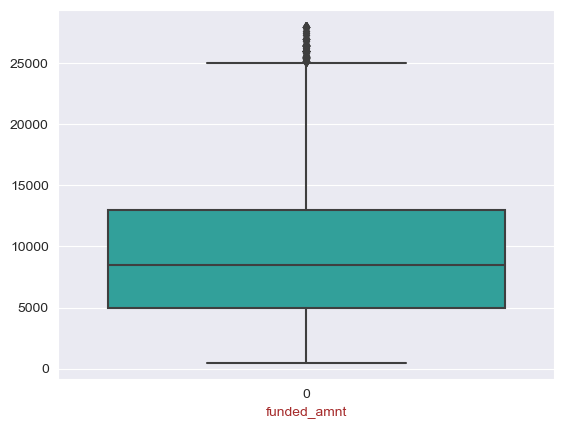

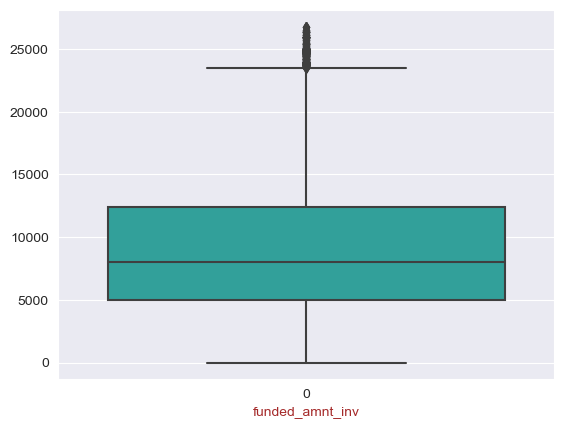

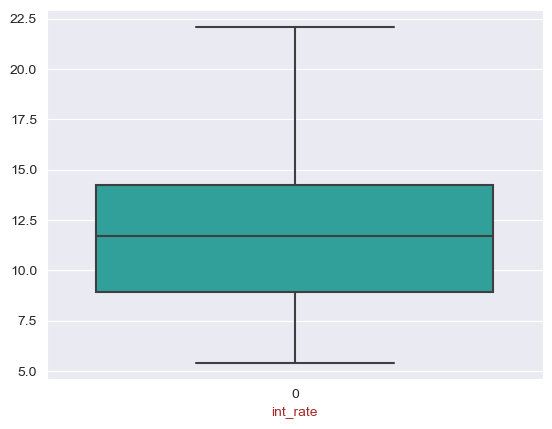

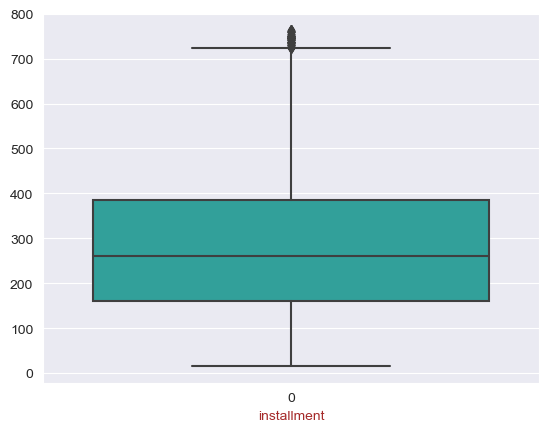

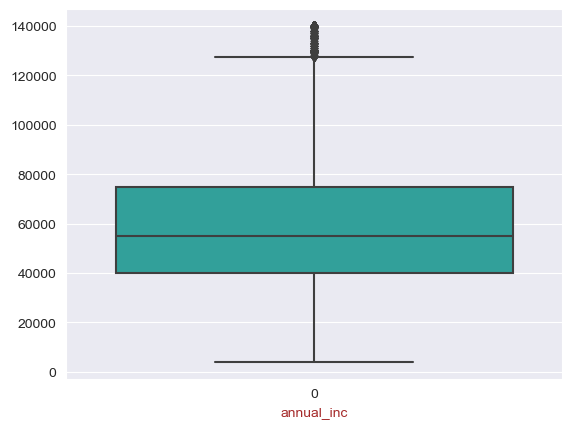

In [43]:
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

for column in numerical_columns:
    with sns.axes_style("darkgrid"):
        sns.boxplot(loan_df[column], color='lightseagreen')
        plt.xlabel(column, color="brown")
        plt.show()

__`Plotting the distribution plot of Numerical columns after removal of outliers`__

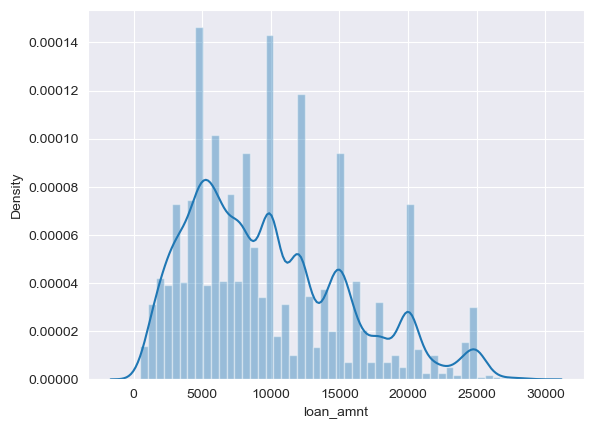

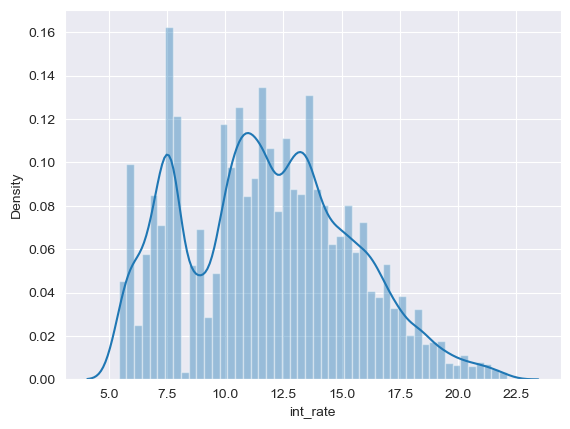

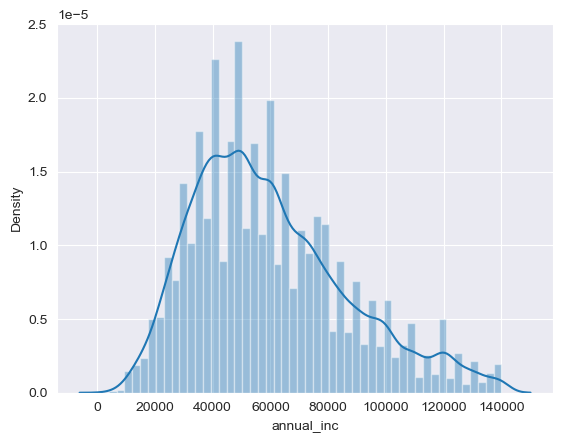

In [44]:
numerical_columns_for_distplot = ["loan_amnt","int_rate","annual_inc"] 

for column in numerical_columns_for_distplot:
    with sns.axes_style("darkgrid"):
        sns.distplot(loan_df[column])
        plt.show()

In [45]:
#Statistical Summary of 'loan_amnt' field
loan_df["loan_amnt"].describe()

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

<div class="alert alert-block alert-success">
    <b>Observations related to 'loan_amnt' field:</br> 
    1) Most of the loan amount applied were in the range of 5k-14k.</br>
    2) Actual Max Loan amount applied should be ~27k (as 29k is an outlier in the box plot).</b>
</div>

In [46]:
#Statistical Summary of 'int_rate' field
loan_df["int_rate"].describe() 

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

<div class="alert alert-block alert-success">
    <b>Observations related to 'int_rate' field:</br> 
    1) Most of the applicant's rate of interest were between 9%-14%</br>
    2) Mean Rate of interest was 11.8 %</b>
</div>

In [47]:
#Statistical Summary of 'annual_inc' field
loan_df["annual_inc"].describe()

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

<div class="alert alert-block alert-success">
    <b>Observations related to 'annual_inc' field:</br> 
    1) The Annual income of most of the applicants lies between 40k-75k.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">1.2 Univariate Analysis on Unordered Categorical Columns</code>

**`1.2.1 Bar plot of 'home_ownership' field`**

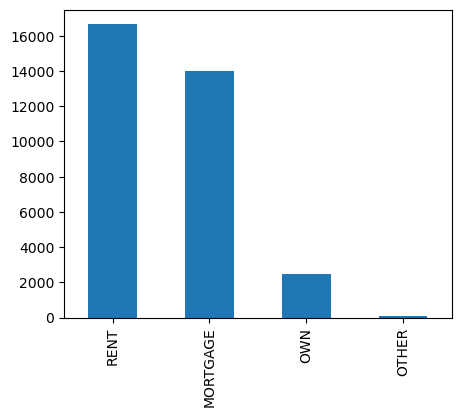

In [48]:
loan_df.home_ownership.value_counts().plot.bar(figsize=(5,4))
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Majority of loan applicants are either living on Rent or on Mortgage.</b>
</div>

**`1.2.2 Bar plot of 'purpose' field`**

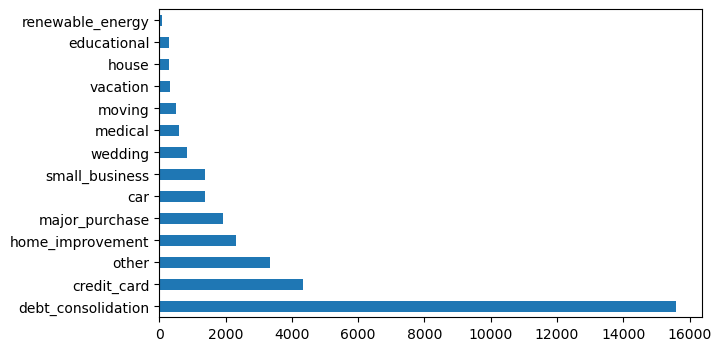

In [49]:
loan_df.purpose.value_counts().plot(figsize=(7,4), kind="barh")
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Most of the loan applicants have applied for loans for debt consolidation purposes.</b>
</div>

**`1.2.3 Bar plot of 'addr_state' field`**

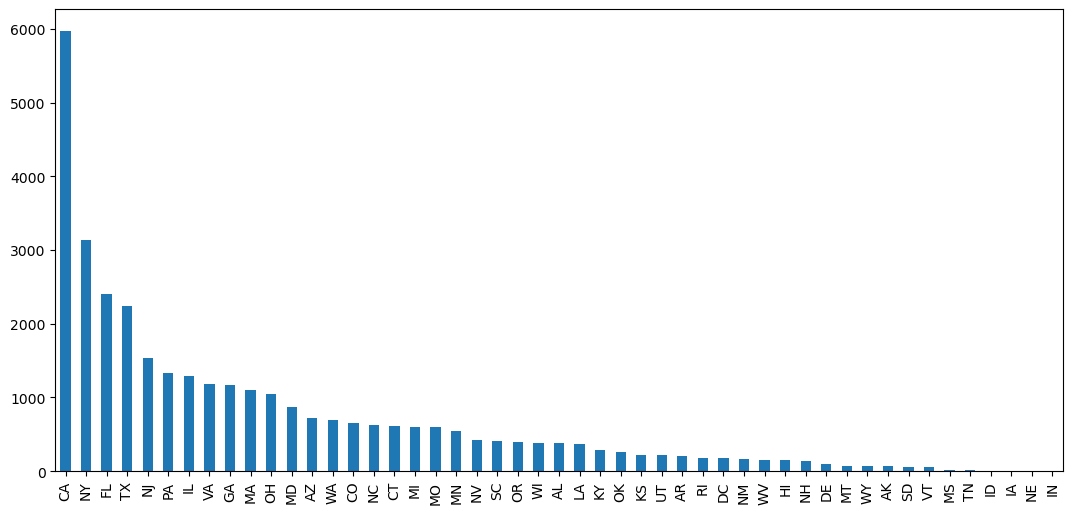

In [50]:
loan_df.addr_state.value_counts().plot.bar(figsize=(13,6))
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Most of the Loan applicants are from State 'CA'.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">1.3 Univariate Analysis on Ordered Categorical Columns</code>

**`1.3.1 Bar plot of 'emp_length' field`**

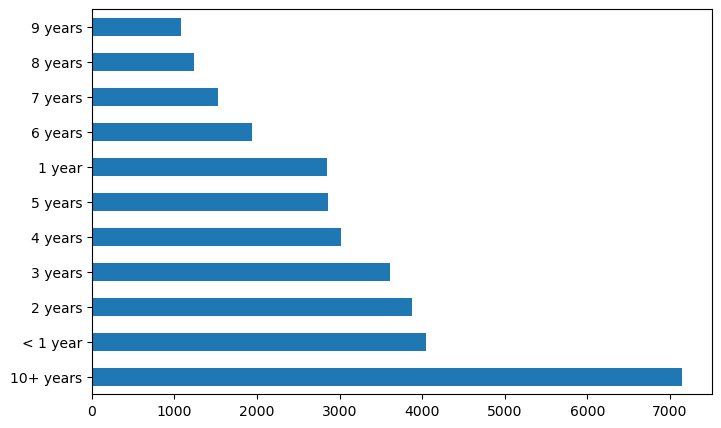

In [51]:
loan_df.emp_length.value_counts().plot(figsize=(8,5), kind="barh")
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Most of the applicants are having 10+ years of Experience.</b>
</div>

---

## 📌 <code style="background:lightyellow;color:black">Segmented Univariate Analysis</code> 📊

### ✏️ <code style="background:lightcyan;color:black">2.1 int_rate</code>

#### `2.1.1 Comparing the 'int_rate' across the 'grade' and across the 'term'` 

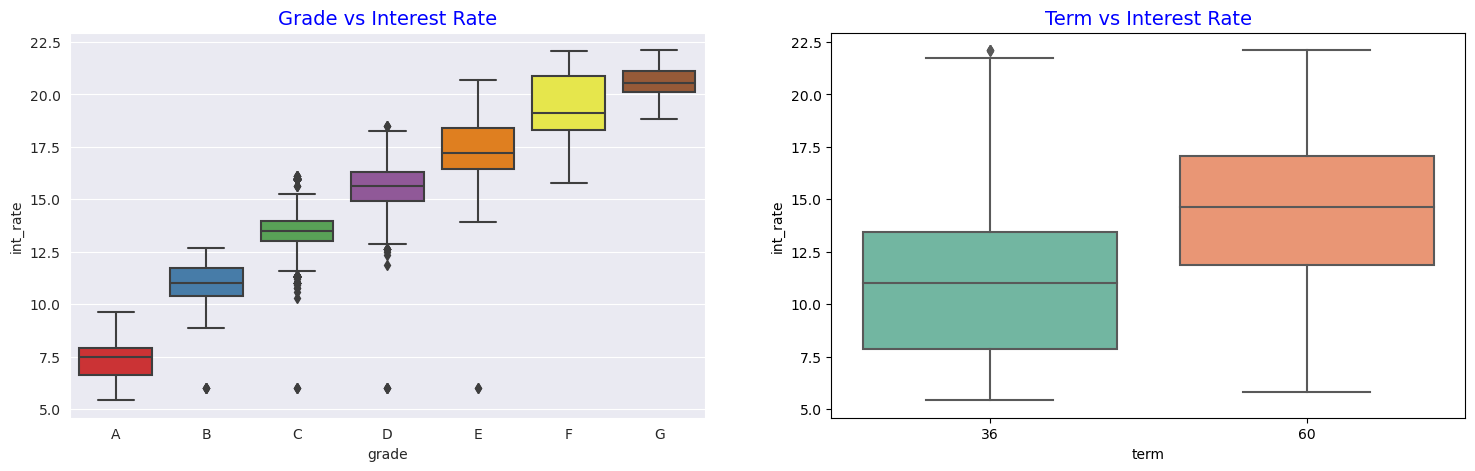

In [52]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    plt.title('Grade vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='grade', y=loan_df.int_rate, data=loan_df, order = sorted(loan_df.grade.unique()), palette='Set1')

plt.subplot(122)
plt.title('Term vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})
sns.boxplot(x='term', y=loan_df.int_rate, data=loan_df, palette='Set2')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations from above plots:</br> 
    1) With decrease in loan grade (A to G), there is increase in interest rate</br>
    2) Interest rates are higher for '60 months' tenured loans compared to '36 months tenured'</b>
</div>

#### `2.1.2 Comparing the 'int_rate' across the 'home_ownership' and across the 'verification_status'`

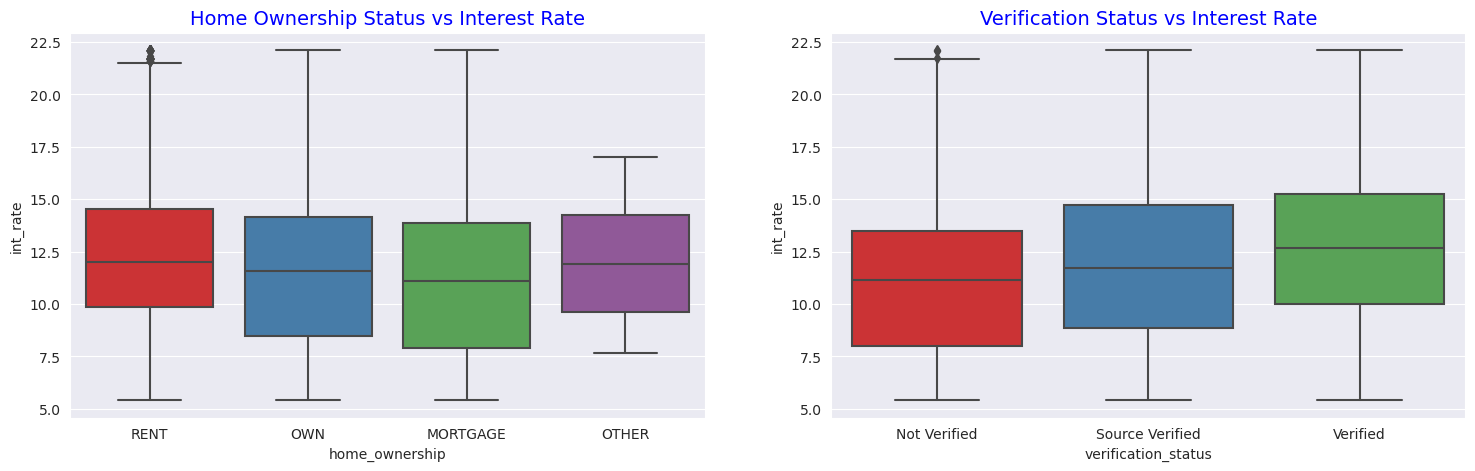

In [53]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    plt.title('Home Ownership Status vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='home_ownership', y=loan_df.int_rate, data=loan_df, palette='Set1')

    plt.subplot(122)
    plt.title('Verification Status vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='verification_status', y=loan_df.int_rate, data=loan_df, 
                order = sorted(loan_df.verification_status.unique()), palette='Set1')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) Borrowers belonging to MORTGAGE and OWN segments have received loan with lesser interest rate.</br>
    2) Compared to 'Verified' and 'Source Verified sub-categories, the 'Not Verified' sub_category received lesser interest rate</b>
</div>

#### `2.1.3 Comparing the 'int_rate' across the 'purpose' and across the 'loan_status'`

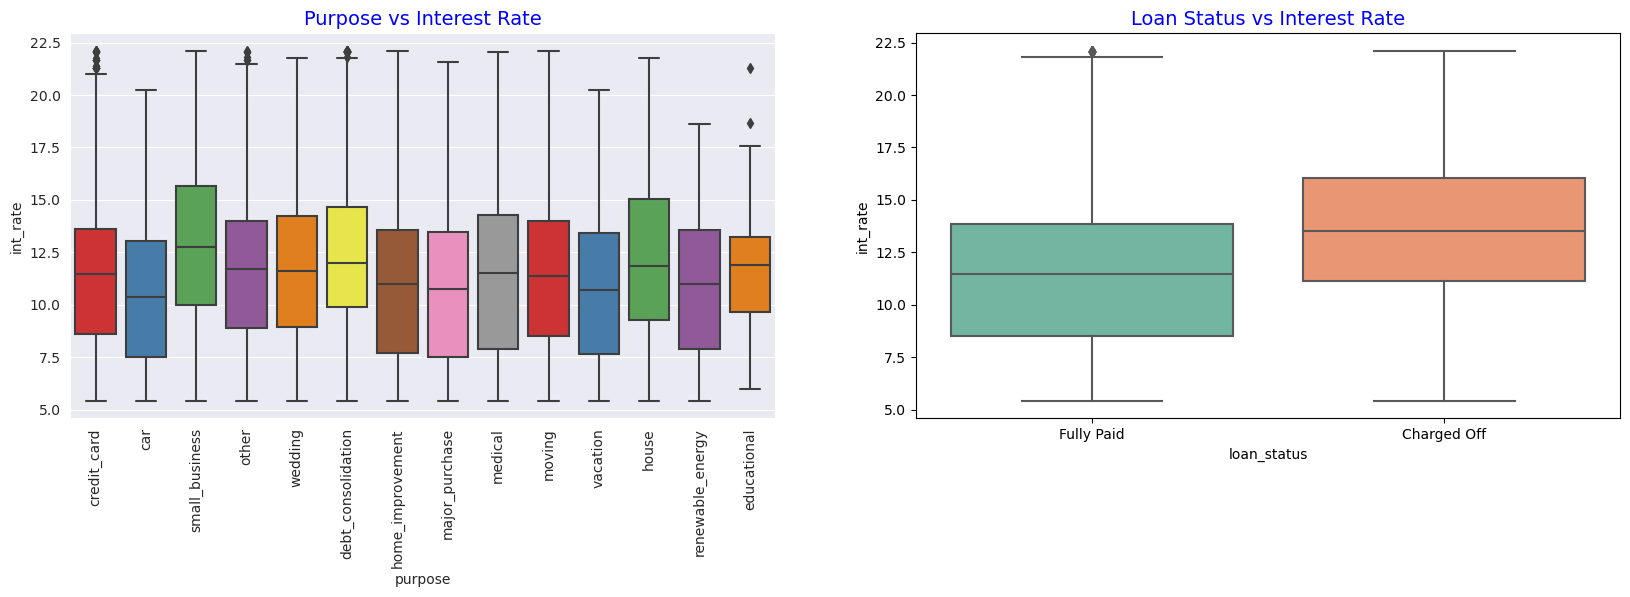

In [54]:
plt.figure(figsize=(20,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(x='purpose', y=loan_df.int_rate, palette='Set1', data=loan_df)
    plt.xticks(rotation=90) #for better readability
    plt.title('Purpose vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})


plt.subplot(122)
sns.boxplot(x='loan_status', y=loan_df.int_rate, palette='Set2', data=loan_df)
plt.title('Loan Status vs Interest Rate', fontdict={'fontsize':14, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) Loan applications for small_business, house and debt_consolidation purposes were charged with higher interest rate compared to others.</br>
    2) More is the interest rate more are the cases of charged-off.</br></b>
</div>

#### `2.1.4 Comparing the 'int_rate' across the 'issue_month' and across the 'issue_year'`

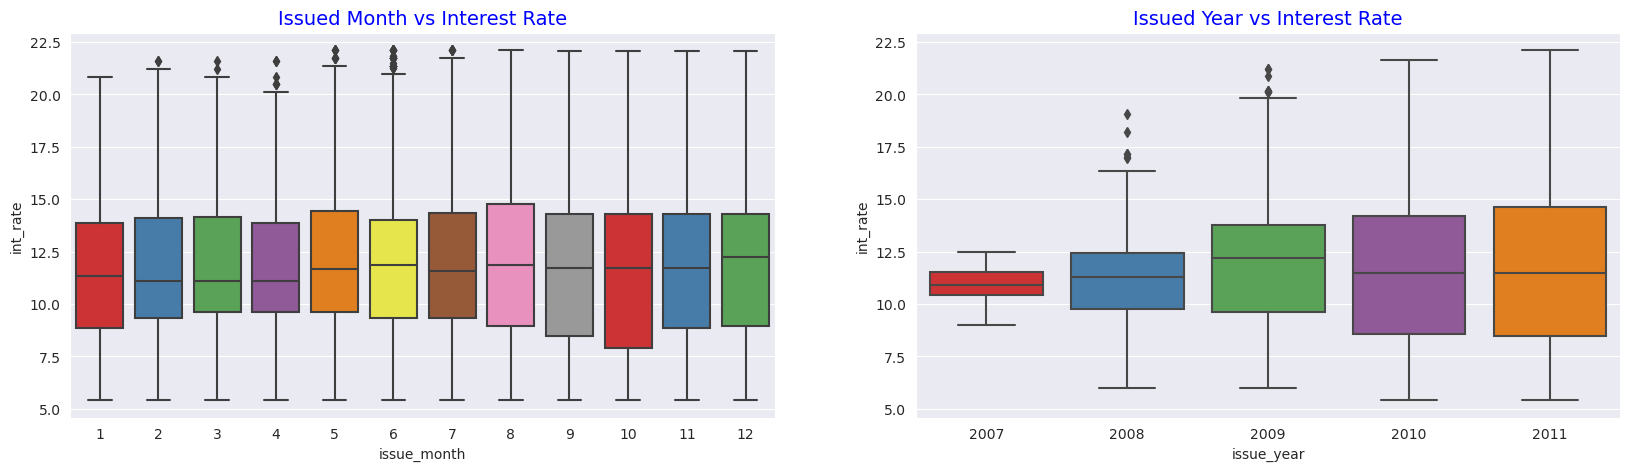

In [55]:
plt.figure(figsize=(20,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(x=loan_df.issue_month, y=loan_df.int_rate, palette='Set1', data=loan_df)
    plt.title('Issued Month vs Interest Rate',fontdict={'fontsize':14, 'color':'blue'})

    plt.subplot(122)
    sns.boxplot(x=loan_df.issue_year, y=loan_df.int_rate, palette='Set1', data=loan_df)
    plt.title('Issued Year vs Interest Rate',fontdict={'fontsize':14, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) During october, loan applications have huge variation in interest rates(denoted by the IQR of 10th month boxplot) </br>
    2) Over the years, the median of interest rate has not changed much, except for the year 2009.</br>
    3) Plus, with each passing year, the IQR of the box plot is increasing denoting that there is increase in variation of loan </br> interest rates due to addition of different types of loans</b>
</div>

#### `2.1.5 Comparing the 'int_rate' across the 'emp_length'`

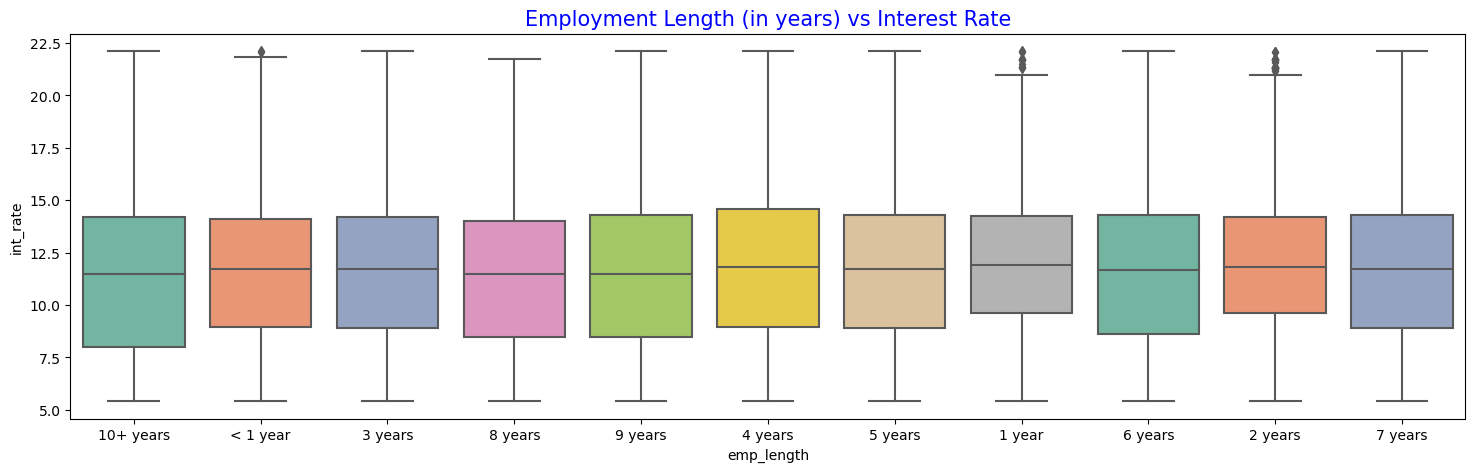

In [56]:
plt.figure(figsize=(18,5))

sns.boxplot(x='emp_length', y=loan_df.int_rate, data=loan_df, palette="Set2")
plt.title('Employment Length (in years) vs Interest Rate',fontdict={'fontsize':15, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Seems like, there is not much of relation between employment length and interest rate</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">2.2 loan_amnt</code>

#### `2.2.1 Comparing the 'loan_amnt' across the 'grade' and across the 'term'` 

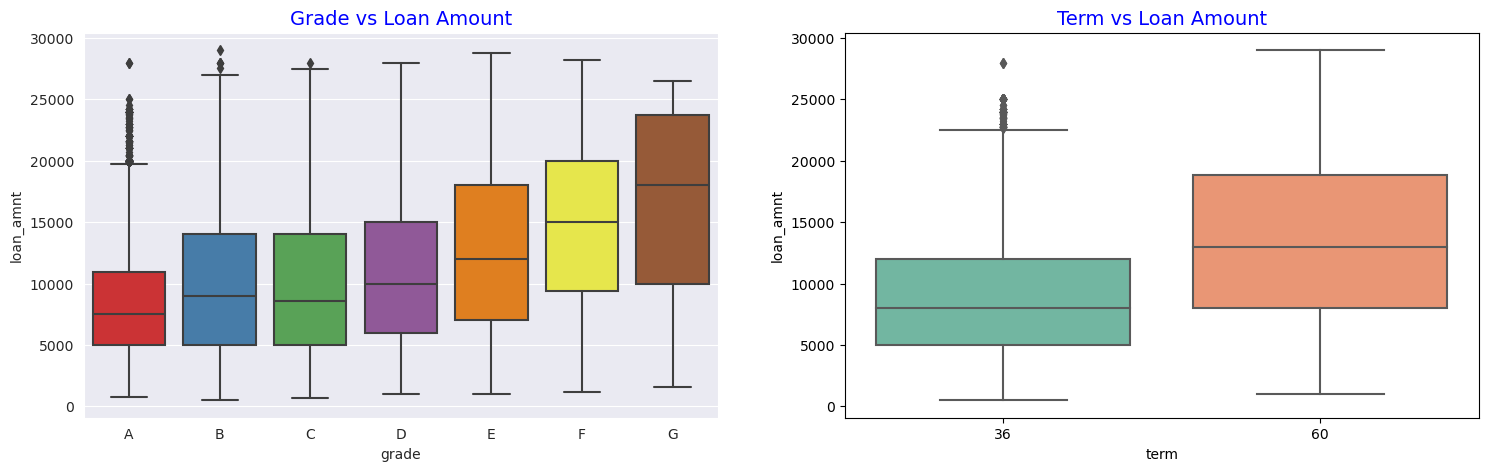

In [57]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    plt.title('Grade vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='grade', y=loan_df.loan_amnt, data=loan_df, order = sorted(loan_df.grade.unique()), palette='Set1')

plt.subplot(122)
plt.title('Term vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})
sns.boxplot(x='term', y=loan_df.loan_amnt, data=loan_df, palette='Set2')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations from above plots:</br> 
    1) With decrease in loan grade (A to G), there is increase in loan_amnt applied by the borrowers</br>
    2) The spread of box plot for 'G' grade loan is the highest among others, signifying majority of applicants have prefered the lowest graded loan </br> with a request of higher loan_amnt</br>
    3) 60 months tenure loans have higher loan_amnt request compared to 36 months. </b>
</div>

#### `2.2.2 Comparing the 'loan_amnt' across the 'home_ownership' and across the 'verification_status'`

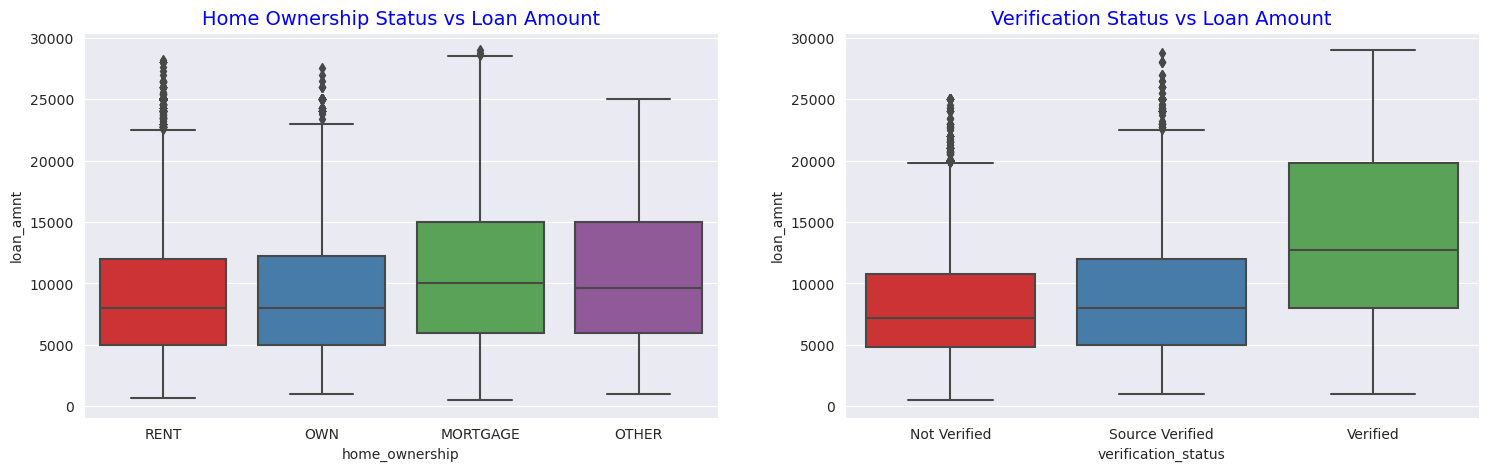

In [58]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    plt.title('Home Ownership Status vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='home_ownership', y=loan_df.loan_amnt, data=loan_df, palette='Set1')

    plt.subplot(122)
    plt.title('Verification Status vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='verification_status', y=loan_df.loan_amnt, data=loan_df, 
                order = sorted(loan_df.verification_status.unique()), palette='Set1')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) Borrowers belonging to MORTGAGE segment have request for highest loan_amnt</br>
    2) And borrowers belonging to OTHER segment have also requested for higher loan_amnt</br>
    3) Borrowers from 'Not Verified' segment requesting for higher loan_amnt can be considered as risky applicants.</b>
</div>

#### `2.2.3 Comparing the 'loan_amnt' across the 'purpose' and across the 'loan_status'`

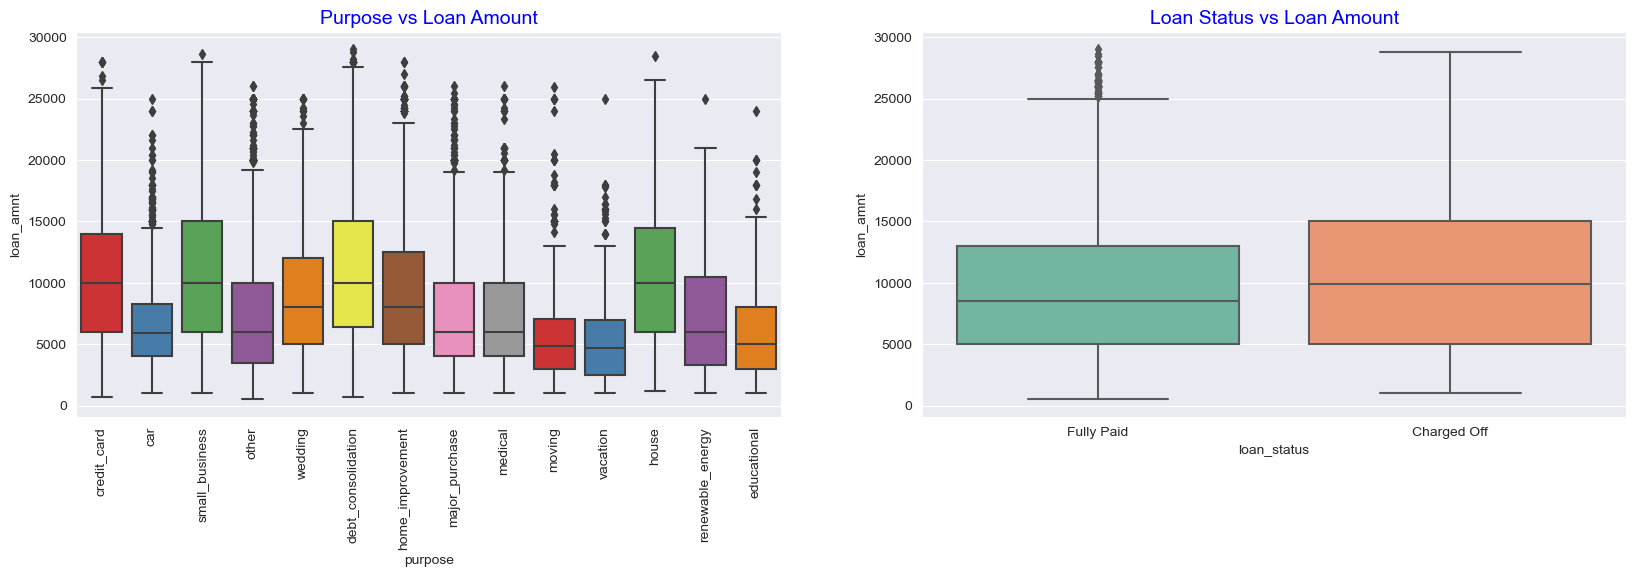

In [59]:
plt.figure(figsize=(20,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(x='purpose', y=loan_df.loan_amnt, palette='Set1', data=loan_df)
    plt.xticks(rotation=90) #for better readability
    plt.title('Purpose vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})

    plt.subplot(122)
    sns.boxplot(x='loan_status', y=loan_df.loan_amnt, palette='Set2', data=loan_df)
    plt.title('Loan Status vs Loan Amount', fontdict={'fontsize':14, 'color':'blue'})

    plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) Borrowers have requested for higher loan amount for small_business and debt_consolidation purposes</br>
    2) Loan applications having higher loan amount request defaulted more.</br></b>
</div>

#### `2.2.4 Comparing the 'loan_amnt' across the 'issue_month' and across the 'issue_year'`

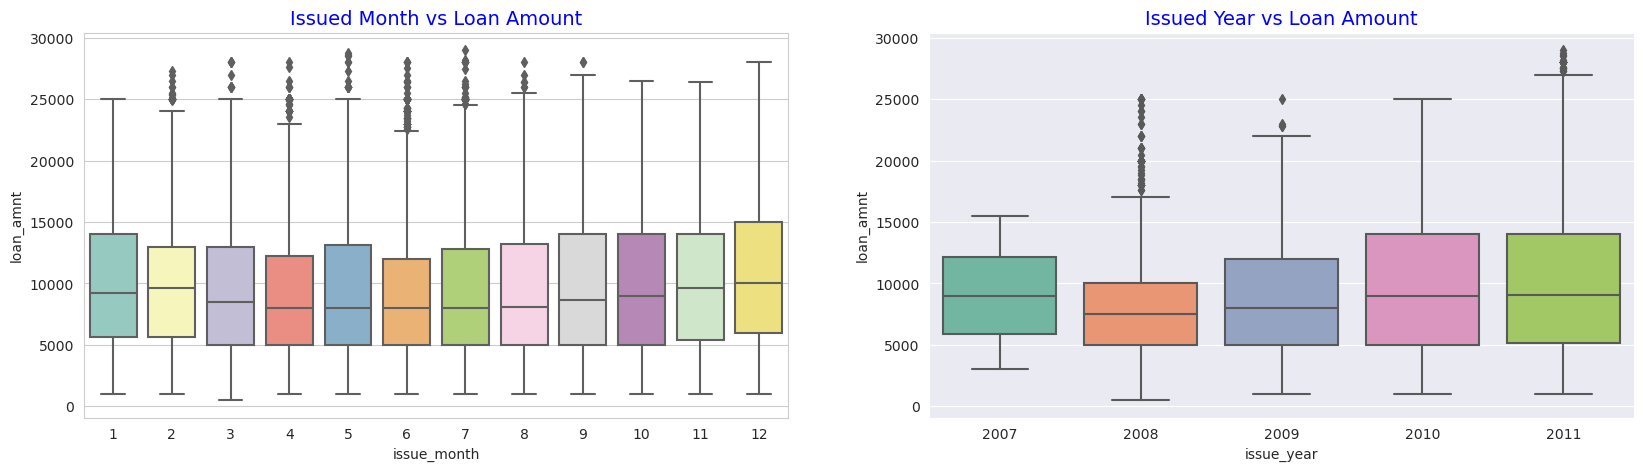

In [60]:
plt.figure(figsize=(20,5))

with sns.axes_style("whitegrid"):
    plt.subplot(121)
    sns.boxplot(x=loan_df.issue_month, y=loan_df.loan_amnt, palette='Set3', data=loan_df)
    plt.title('Issued Month vs Loan Amount',fontdict={'fontsize':14, 'color':'blue'})

with sns.axes_style("darkgrid"):    
    plt.subplot(122)
    sns.boxplot(x=loan_df.issue_year, y=loan_df.loan_amnt, palette='Set2', data=loan_df)
    plt.title('Issued Year vs Loan Amount',fontdict={'fontsize':14, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
    1) Loan amount request increased during Winter season months due to Winter festivals.</br>
    2) Loan amount request was least for the year 2008 due to 'Great recession'</b>
</div>

#### `2.2.5 Comparing the 'loan_amnt' across the 'emp_length'`

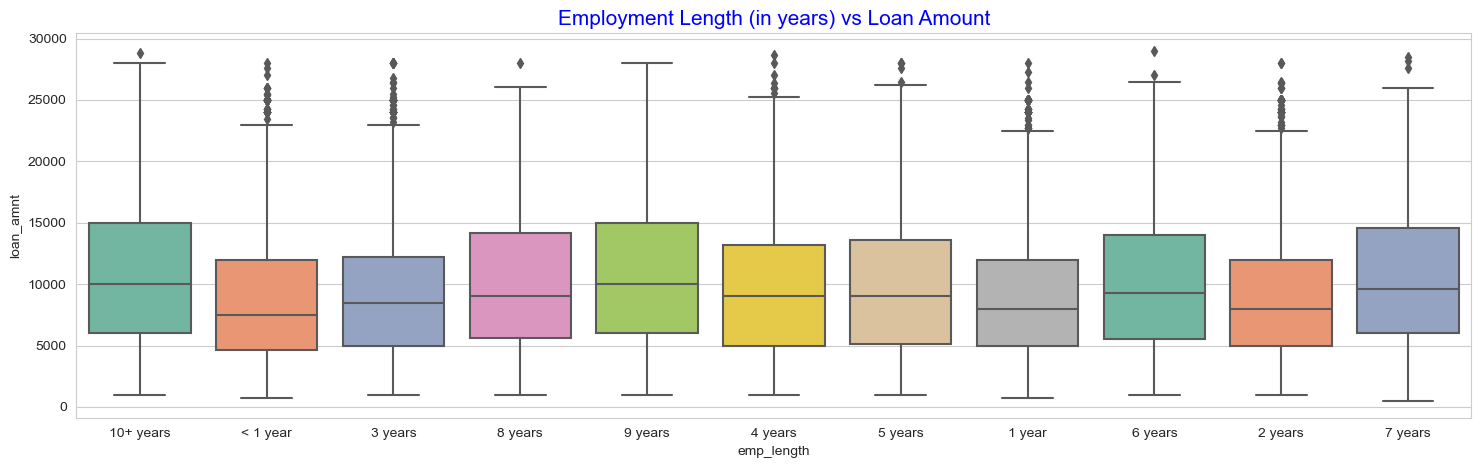

In [61]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(18,5))
    sns.boxplot(x='emp_length', y=loan_df.loan_amnt, data=loan_df, palette="Set2")
    plt.title('Employment Length (in years) vs Loan Amount',fontdict={'fontsize':15, 'color':'blue'})
    plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Borrowers having higher professional experience have requested for higher loan amount</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">2.3 funded_amnt</code>

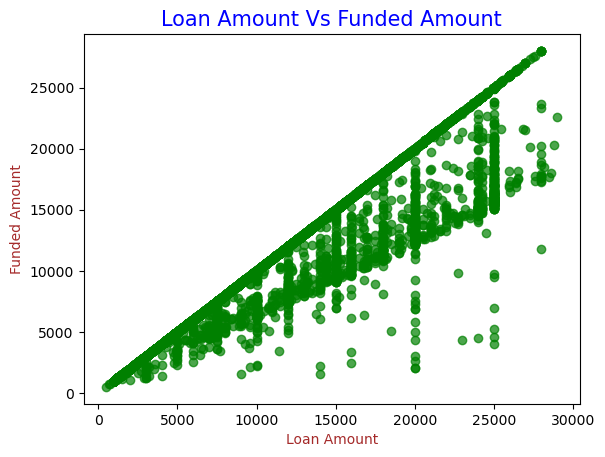

In [62]:
#Checking the relationship between the fields 'loan_amnt' and 'funded_amnt'

plt.scatter(loan_df["loan_amnt"], loan_df["funded_amnt"], c='green', alpha=0.7)
plt.title("Loan Amount Vs Funded Amount",fontdict={'fontsize':15, 'color':'blue'})
plt.xlabel("Loan Amount",fontdict={'fontsize':10, 'color':'brown'})
plt.ylabel("Funded Amount",fontdict={'fontsize':10, 'color':'brown'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) There is a linear relationship between 'loan_amnt' column and 'funded_amnt' column as shown by the above scatter plot.</br>
        2) Therefore, the Segmented univariate analysis of 'funded_amnt' column will be similar to that of 'loan_amnt' column.
</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">2.4 dti (debt to income ratio)</code>

#### `2.4.1 Comparing the 'dti' across the 'grade' and across the 'term'`

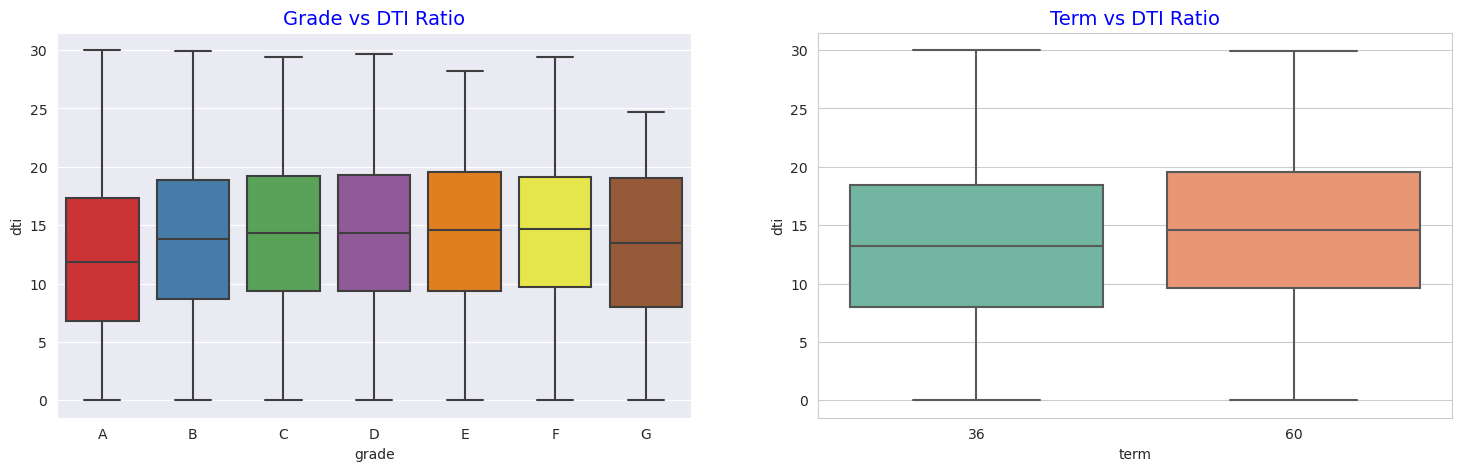

In [63]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    plt.title('Grade vs DTI Ratio', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='grade', y=loan_df["dti"], data=loan_df, order = sorted(loan_df.grade.unique()), palette='Set1')

with sns.axes_style("whitegrid"):
    plt.subplot(122)
    plt.title('Term vs DTI Ratio', fontdict={'fontsize':14, 'color':'blue'})
    sns.boxplot(x='term', y=loan_df["dti"], data=loan_df, palette='Set2')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) Borrowers with lower dti tend to get better grade loans like 'A' & 'B'</br>
        2) Customers with higher dti are opting for larger tenure loans like 60 months instead of 36 months.
</b>
</div>

#### `2.4.2 Comparing the 'dti' across the 'purpose' and across the 'loan_status'`

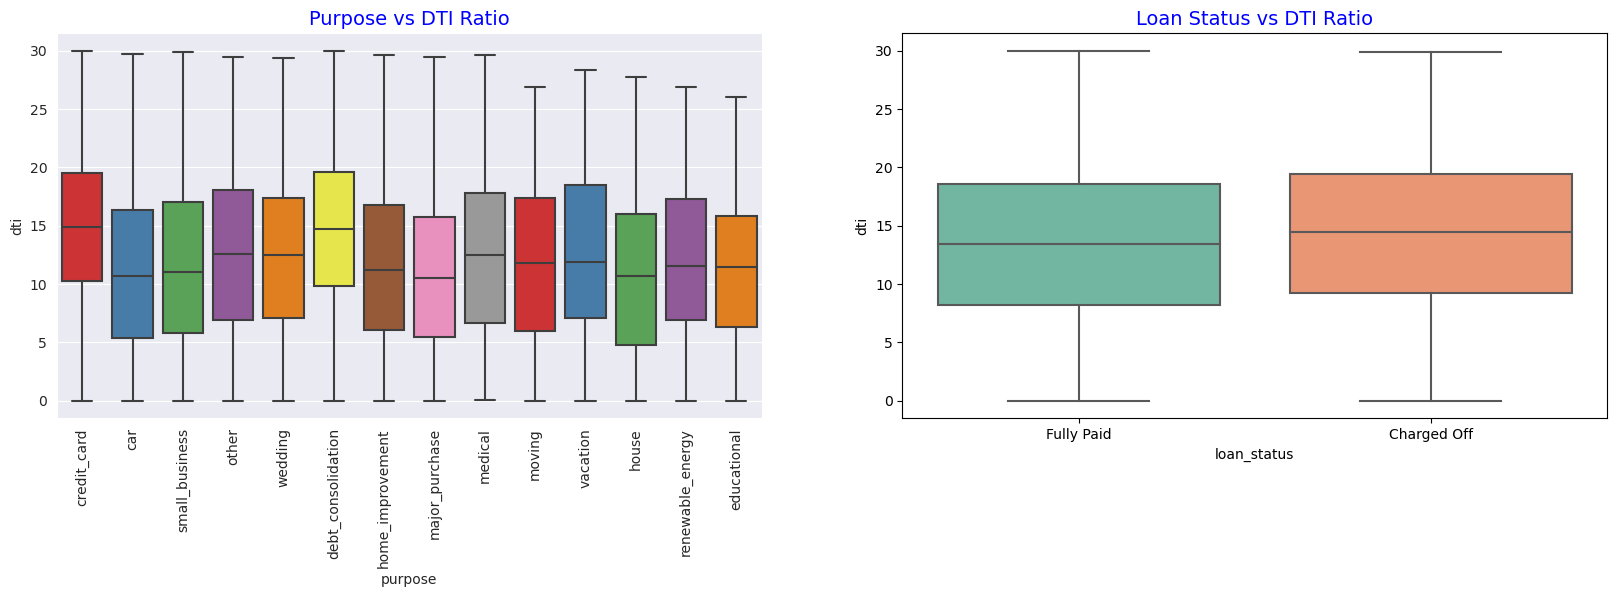

In [64]:
plt.figure(figsize=(20,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.boxplot(x='purpose', y=loan_df["dti"], palette='Set1', data=loan_df)
    plt.xticks(rotation=90) #for better readability
    plt.title('Purpose vs DTI Ratio', fontdict={'fontsize':14, 'color':'blue'})

plt.subplot(122)
sns.boxplot(x='loan_status', y=loan_df["dti"], palette='Set2', data=loan_df)
plt.title('Loan Status vs DTI Ratio', fontdict={'fontsize':14, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) Applicants taking loan for 'debt_consolidation' and 'credit_card' purpose have higher DTI compared to other purposes.</br>
        2) Customers with higher dti have more chance of default.
</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">2.5 annual_inc</code>

#### `2.5.1 Comparing the 'annual_inc' across the 'loan_status'`

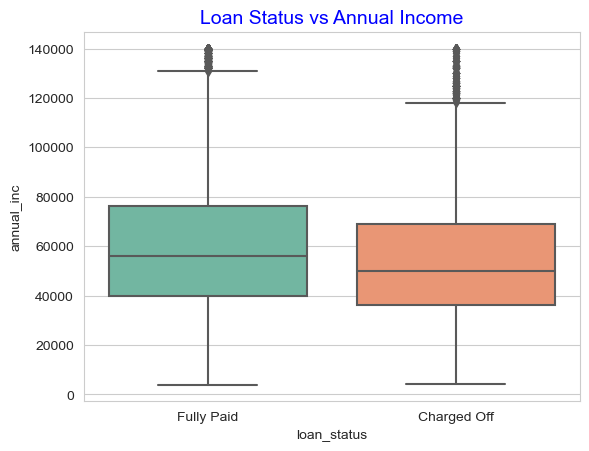

In [65]:
with sns.axes_style("whitegrid"):    
    sns.boxplot(x='loan_status', y=loan_df["annual_inc"], data=loan_df, palette='Set2')
    plt.title('Loan Status vs Annual Income', fontdict={'fontsize':14, 'color':'blue'})
    plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Borrowers who are having higher annual income are more likely to fully pay the loan</b>
</div>

<div class="alert alert-block alert-info">
    <b>Generic Observation: The 'annual_inc' field doesn't have any significant impact on other categorical fields except for the 'loan_status' field</b>
</div>

***

## 📌 <code style="background:lightyellow;color:black">Bivariate Analysis (Numerical vs Categorical)</code> 📊

### ✏️ <code style="background:lightcyan;color:black">3.1 Grade</code>

In [66]:
#Creating a sorted grade list
grade_list_sorted = sorted(loan_df.grade.unique())
grade_list_sorted

['A', 'B', 'C', 'D', 'E', 'F', 'G']

#### `3.1.1 Grade vs Loan Amount`

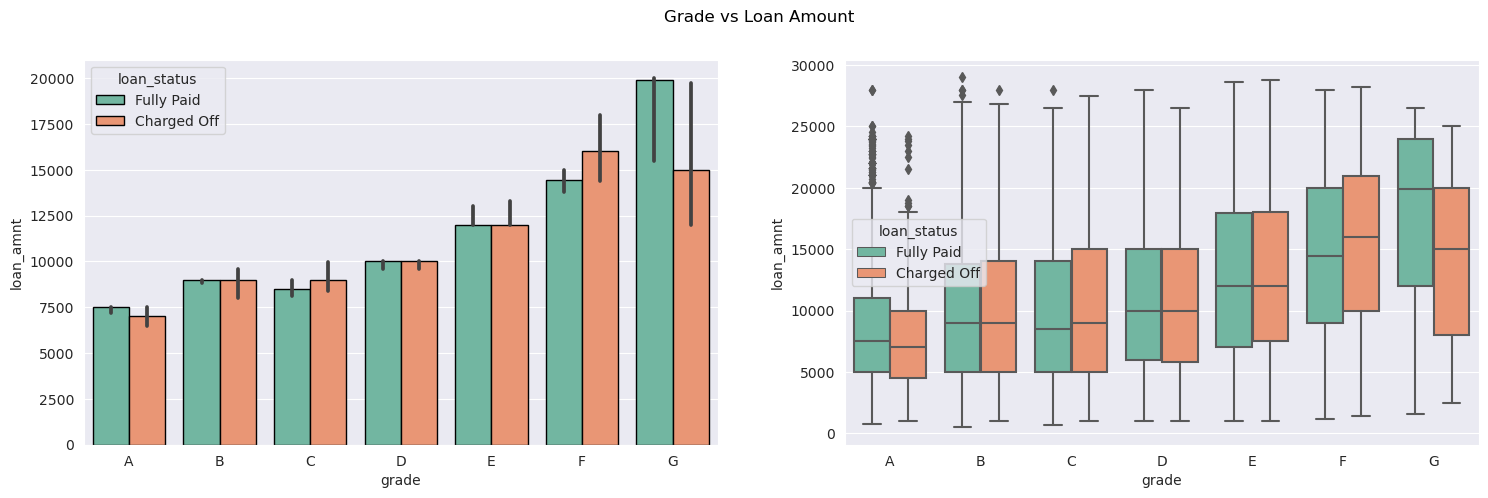

In [67]:
with sns.axes_style("darkgrid"):    
    plt.figure(figsize=(18,5))

    plt.subplot(121)
    sns.barplot(data=loan_df, x='grade', y='loan_amnt', hue='loan_status', estimator=np.median,
                palette='Set2',edgecolor='black', order = grade_list_sorted)

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='grade', y='loan_amnt', hue='loan_status', palette='Set2', 
                order = grade_list_sorted)
    
plt.suptitle('Grade vs Loan Amount')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Customers who took lower graded loans (like 'F', 'G' etc) with higher loan amount, have more chances of being charged-off.</b>
</div>

#### `3.1.2 Grade vs Loan Status`

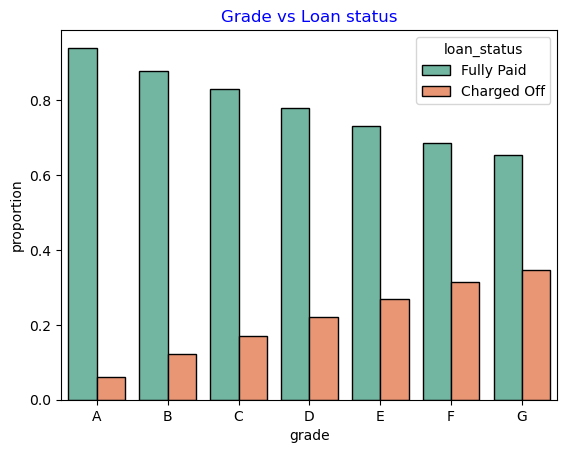

In [68]:
#Finding Proportion of values for each sub-category of 'grade' field
data = loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
data['proportion'] = data.groupby('grade')['id'].transform(lambda x: x/x.sum())

sns.barplot(data=data, x='grade', y='proportion', hue='loan_status', 
            hue_order = ['Fully Paid', 'Charged Off'], palette='Set2', edgecolor='black')

plt.title('Grade vs Loan status', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) As the loan grade decreases (A to G), the proportion of loan default increases (A to G).</br>
        2) Also, as the loan grade decreases (A to G), the proportion of fully-paid cases decreases (A to G).
</b>
</div>

#### `3.1.3 Grade vs Interest Rate`

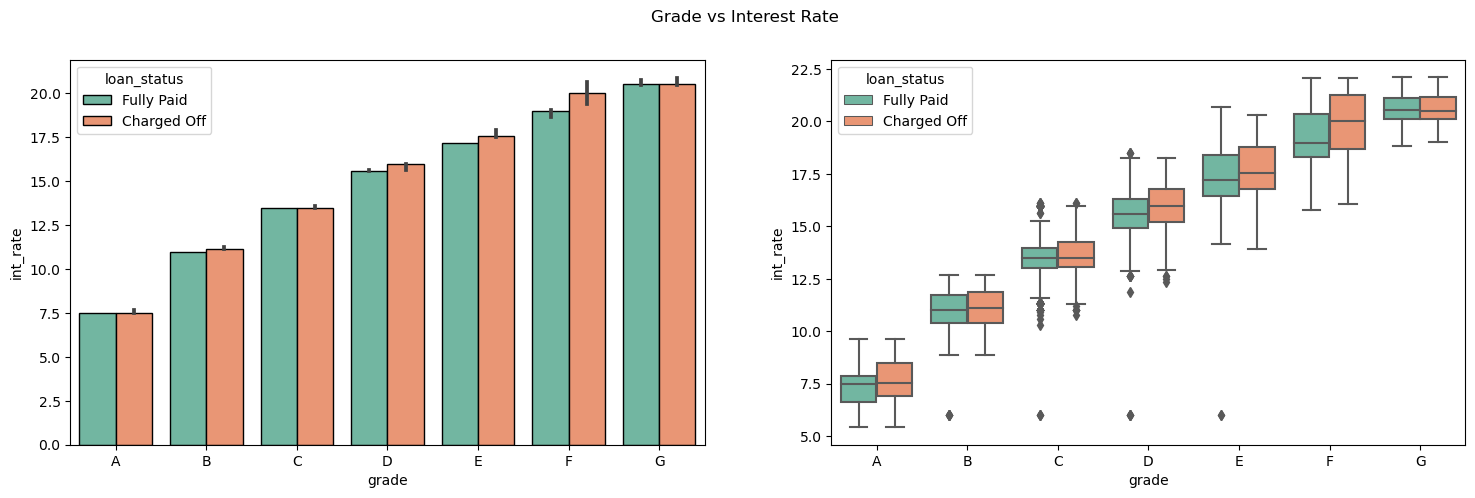

In [69]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(data=loan_df, x='grade', y='int_rate', hue='loan_status', order = grade_list_sorted, 
            estimator=np.median, palette='Set2',edgecolor='black')

plt.subplot(122)
sns.boxplot(data=loan_df, x='grade', y='int_rate', hue='loan_status', order = grade_list_sorted,
           palette='Set2')

plt.suptitle('Grade vs Interest Rate')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation:</br> With decrease in loan grade, the loans suffer a gradual increase in the interest rate, and the borrowers become more likely to default the loan.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">3.2 Term</code>

#### `3.2.1 Term vs Loan Amount`

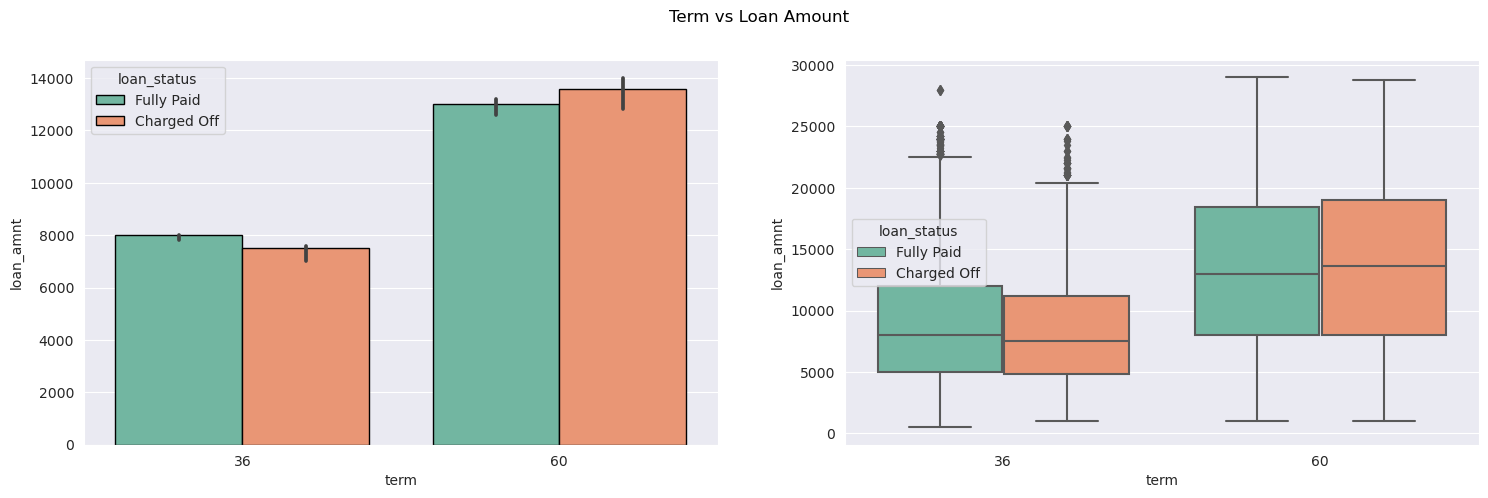

In [70]:
with sns.axes_style("darkgrid"):    
    plt.figure(figsize=(18,5))

    plt.subplot(121)
    sns.barplot(data=loan_df, x='term', y='loan_amnt', hue='loan_status', estimator=np.median,
                palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='term', y='loan_amnt', hue='loan_status', palette='Set2' )
    
plt.suptitle('Term vs Loan Amount')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) 'Fully Paid' and 'Charged off' have nearly equal spread(IQR) in both the sub-categories of 'term'.</br>
        2) Looks like, Loan amount is not a decider for defaults in both the sub-categories of 'term'.
</b>
</div>

#### `3.2.2 Term vs Loan Status`

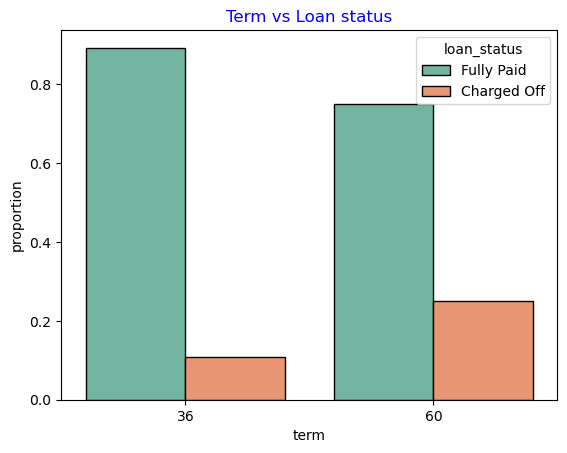

In [71]:
#Finding Proportion of values for each sub-category of 'term' field
data = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
data['proportion'] = data.groupby('term')['id'].transform(lambda x: x/x.sum())

sns.barplot(data=data, x='term', y='proportion', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'], 
            palette='Set2', edgecolor='black')

plt.title('Term vs Loan status', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) Seems like, more proportion of '60 months tenured' loans defaulted as compared to the proportion of '36 months tenured' loans.</br>
        2) Plus, '36 months tenured' loans have higher 'Fully Paid' proportion.
</b>
</div>

#### `3.2.3 Term vs Interest Rate`

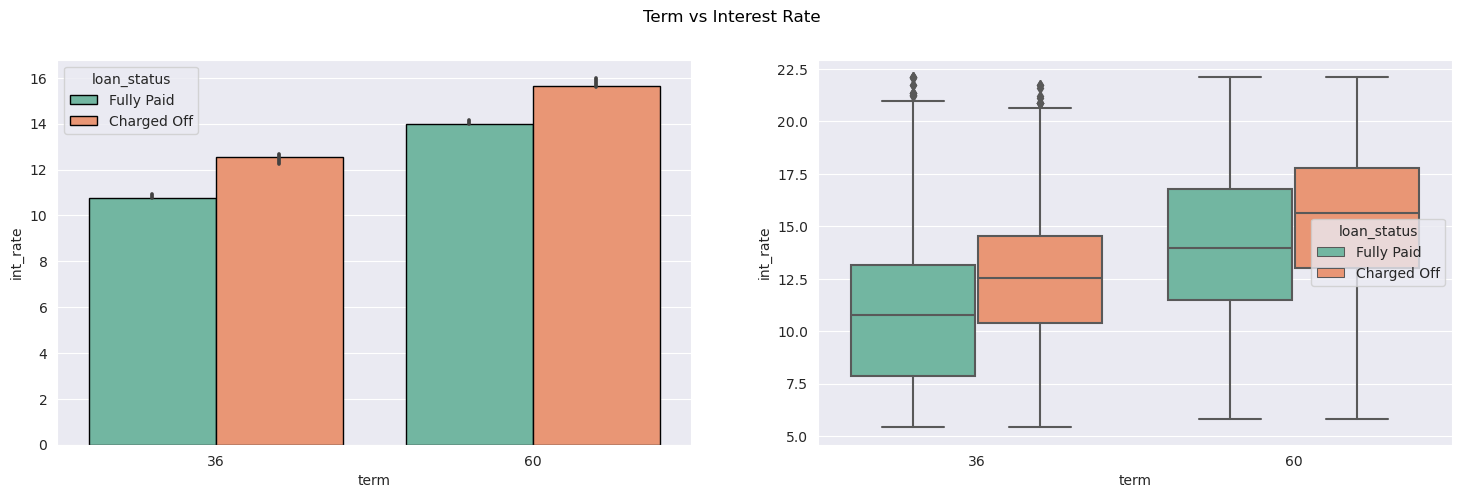

In [72]:
plt.figure(figsize=(18,5))
with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.barplot(data=loan_df, x='term', y='int_rate', hue='loan_status', estimator=np.median, 
                palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='term', y='int_rate', hue='loan_status', palette='Set2')
    
plt.suptitle('Term vs Interest Rate')    
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: High interest loans of ‘60 months’ tenure are more prone to being charged-off.
</b>
</div>

#### `3.2.4 Term vs DTI`

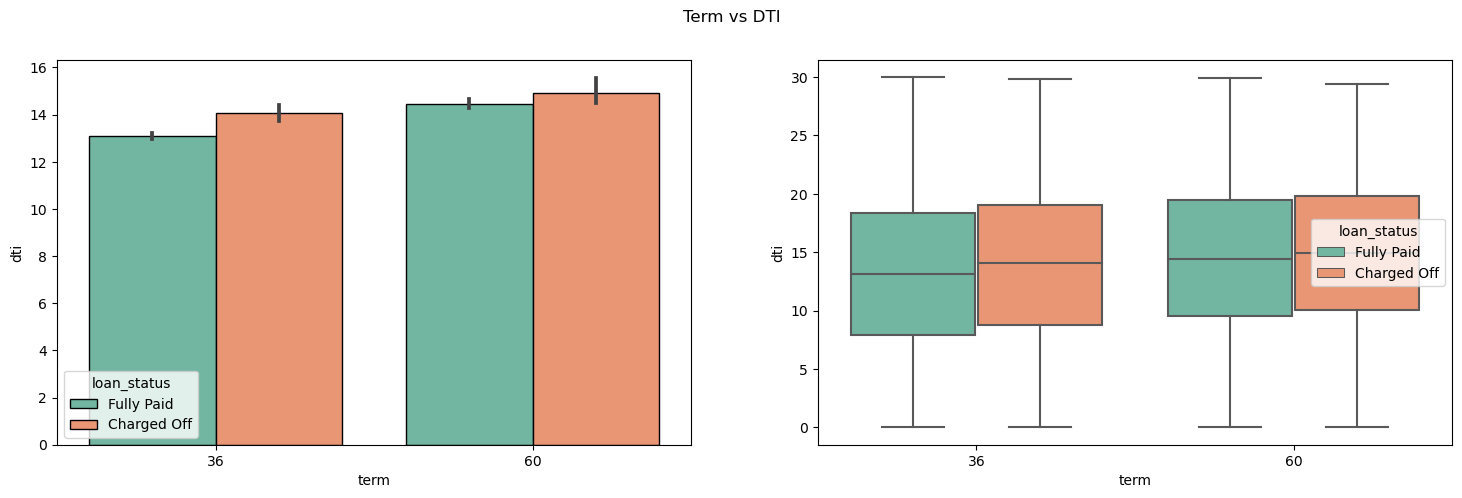

In [73]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(data=loan_df, x='term', y='dti', hue='loan_status', estimator=np.median,
           palette='Set2',edgecolor='black')

plt.subplot(122)
sns.boxplot(data=loan_df, x='term', y='dti', hue='loan_status', palette='Set2')

plt.suptitle('Term vs DTI')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation:</br> With rise in DTI, charged-off cases are comparatively higher than fully-paid cases, for both 36 months & 60 months tenured loans.
</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">3.3 Employment Length</code>

#### `3.3.1 emp_length vs loan_amnt`

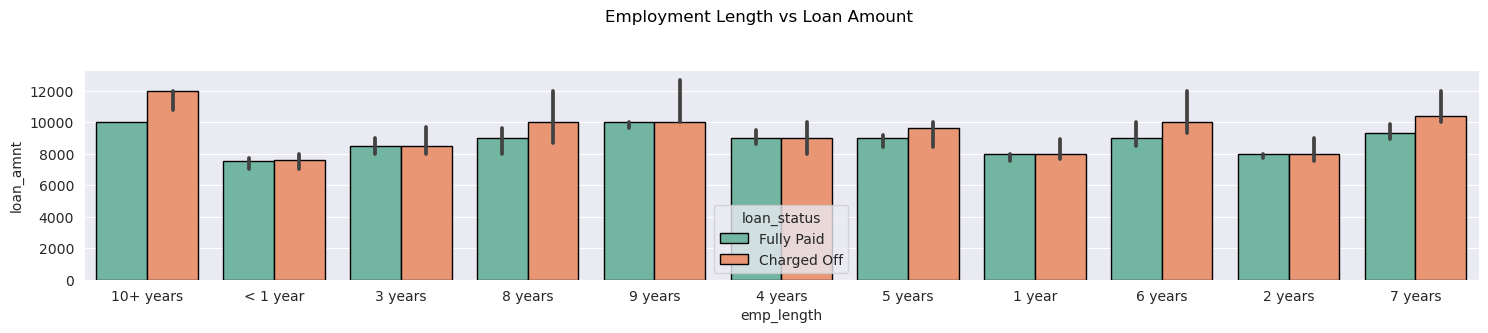

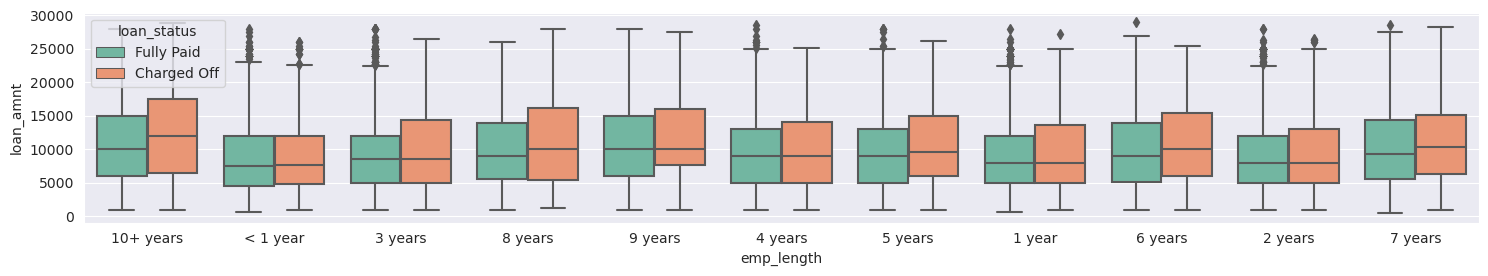

In [74]:
plt.figure(figsize=(18,6))
plt.suptitle('Employment Length vs Loan Amount')

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sns.barplot(data=loan_df, x='emp_length', y='loan_amnt', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.figure(figsize=(18,6))
    plt.subplot(212)
    sns.boxplot(data=loan_df, x='emp_length', y='loan_amnt', hue='loan_status', palette='Set2')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Constumers having higher professional experience requested for more loan amounts and have more default rate.</b>
</div>

#### `3.3.2 emp_length vs loan_status`

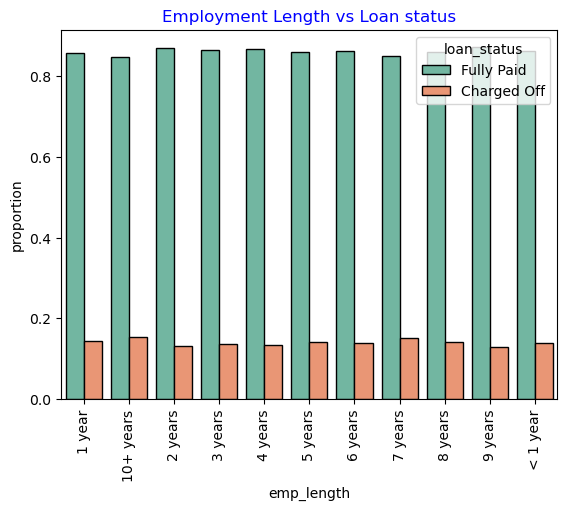

In [75]:
#Finding Proportion of values for each sub-category of 'emp_length' field
data = loan_df.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
data['proportion'] = data.groupby('emp_length')['id'].transform(lambda x: x/x.sum())

sns.barplot(data=data, x='emp_length', y='proportion', hue='loan_status', hue_order = ['Fully Paid', 'Charged Off'], 
            palette='Set2', edgecolor='black')
plt.xticks(rotation=90)

plt.title('Employment Length vs Loan status', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Seems like, Employment length is not a decider for loan defaults.</b>
</div>

#### `3.3.3 emp_length vs int_rate`

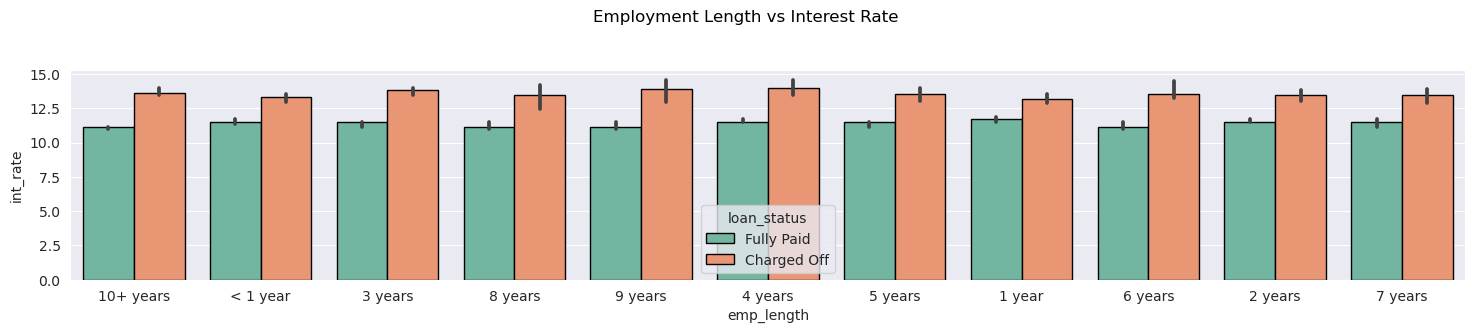

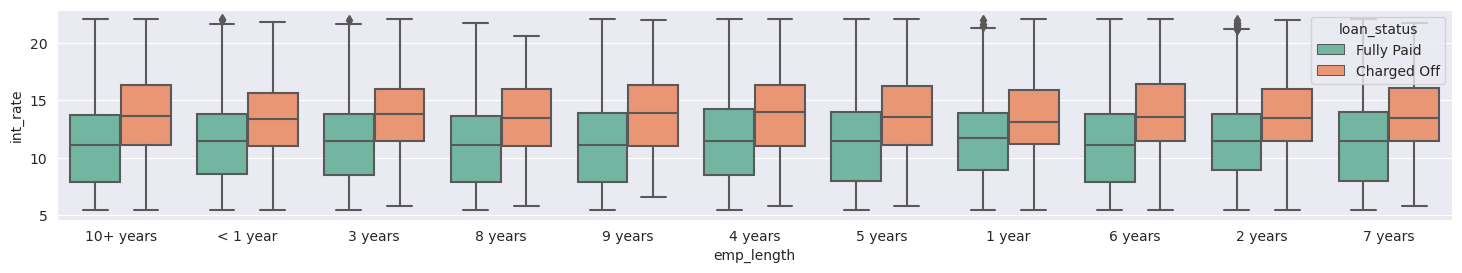

In [76]:
plt.figure(figsize=(18,6))
plt.suptitle('Employment Length vs Interest Rate')

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sns.barplot(data=loan_df, x='emp_length', y='int_rate', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.figure(figsize=(18,6))
    plt.subplot(212)
    sns.boxplot(data=loan_df, x='emp_length', y='int_rate', hue='loan_status',palette='Set2')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Irrespective of employment length, loans with higher interest rate got defaulted more.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">3.4 Home ownership</code>

#### `3.4.1 home_ownership vs loan_amnt`

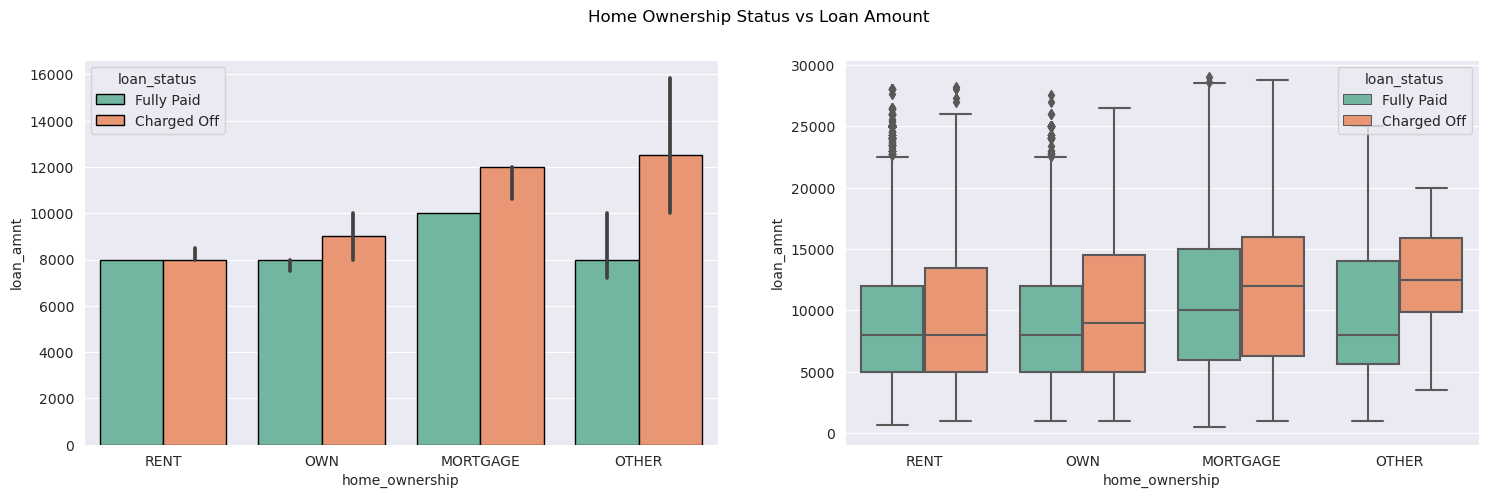

In [77]:
plt.figure(figsize=(18,5))
with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.barplot(data=loan_df, x='home_ownership', y='loan_amnt', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='home_ownership', y='loan_amnt', hue='loan_status', palette="Set2")

plt.suptitle('Home Ownership Status vs Loan Amount')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Borrowers from ‘OTHER’ and ‘MORTGAGE’ home ownership status, taking higher loan amount have defaulted more.</b>
</div>

#### `3.4.2 home_ownership vs loan_status`

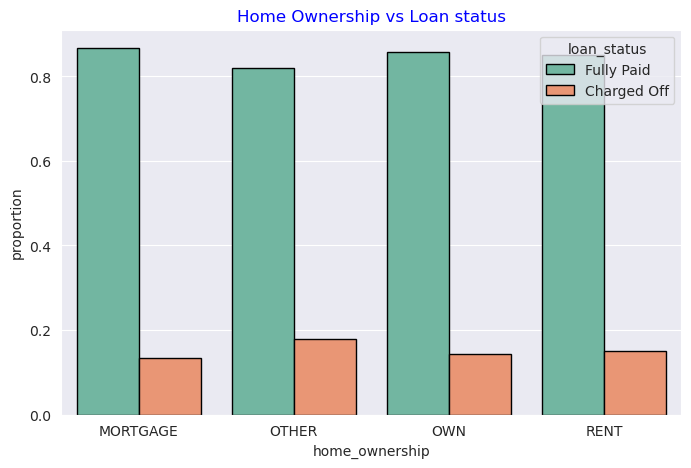

In [78]:
#Finding Proportion of values for each sub-category of 'home_ownership' field
data = loan_df.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
data['proportion'] = data.groupby('home_ownership')['id'].transform(lambda x: x/x.sum())

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(8,5))
    sns.barplot(data=data, x='home_ownership', y='proportion', hue='loan_status', 
                hue_order = ['Fully Paid', 'Charged Off'],palette='Set2', edgecolor='black')

plt.title('Home Ownership vs Loan status', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: There is slightly high proportion of defaults being populated for 'OTHER' sub-category.</b>
</div>

#### `3.4.3 home_ownership vs int_rate`

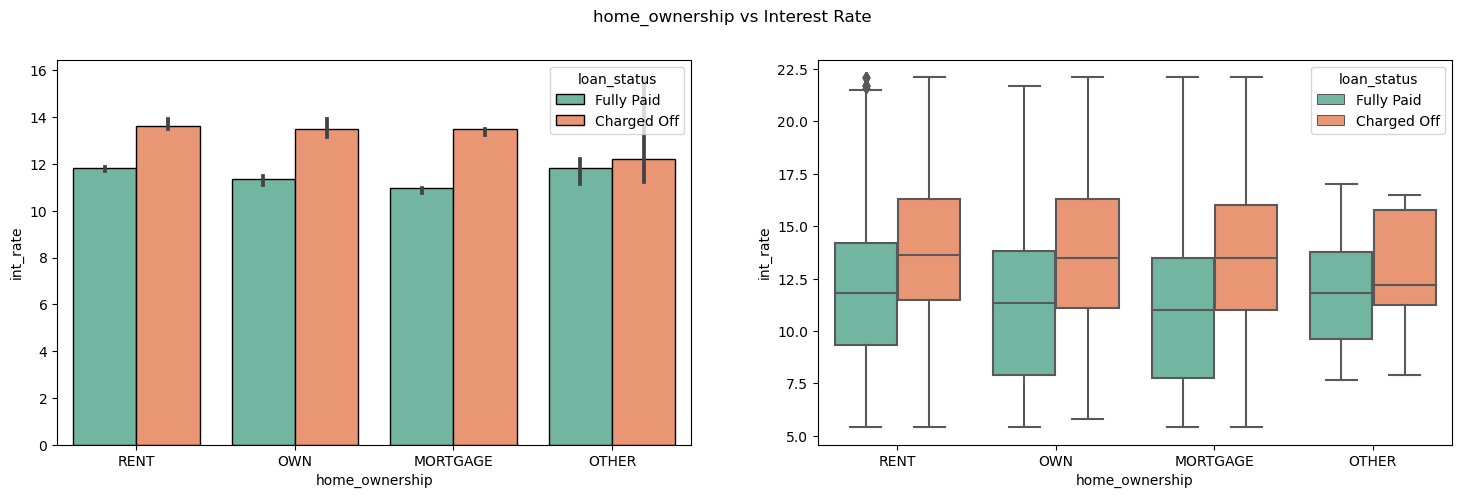

In [79]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(data=loan_df, x='home_ownership', y='int_rate', hue='loan_status', estimator=np.median,
           palette='Set2',edgecolor='black')

plt.subplot(122)
sns.boxplot(data=loan_df, x='home_ownership', y='int_rate', hue='loan_status',palette='Set2')

plt.suptitle('home_ownership vs Interest Rate')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Irrespective of Home ownership status, when the rate of interest is high, the charged-off rate is also high.</b>
</div>

#### `3.4.4 home_ownership vs dti`

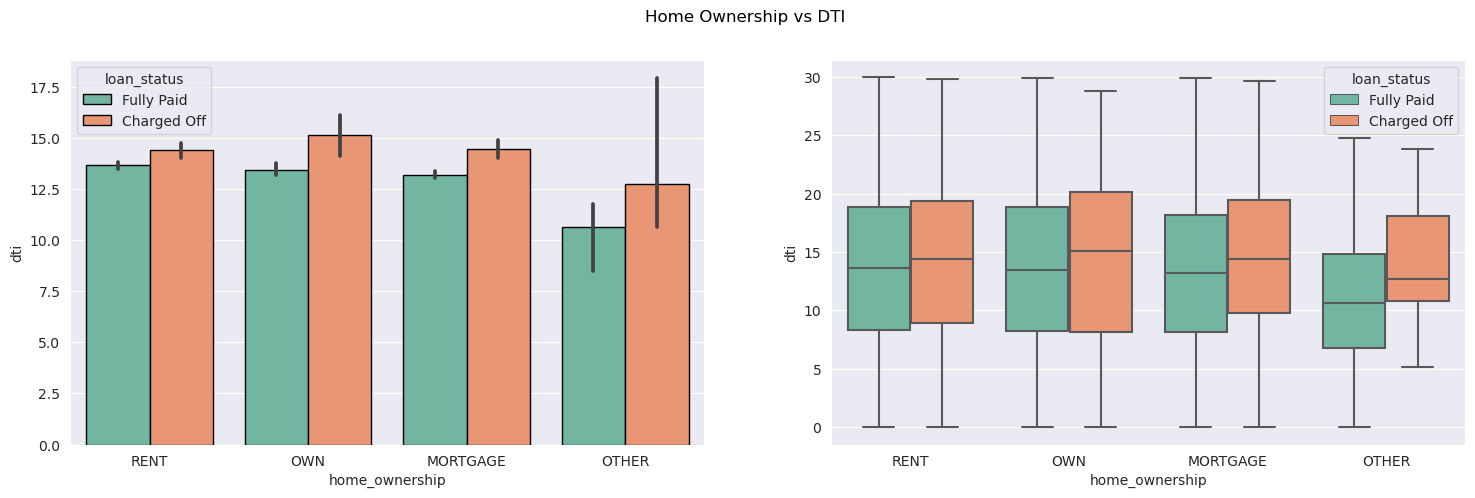

In [80]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.barplot(data=loan_df, x='home_ownership', y='dti', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='home_ownership', y='dti', hue='loan_status',palette='Set2')

plt.suptitle('Home Ownership vs DTI')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Applicants from 'OTHER' home ownership sub-category have lesser dti compared to other sub-categories.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">3.5 Address State</code>

#### `3.5.1 addr_state vs loan_status`

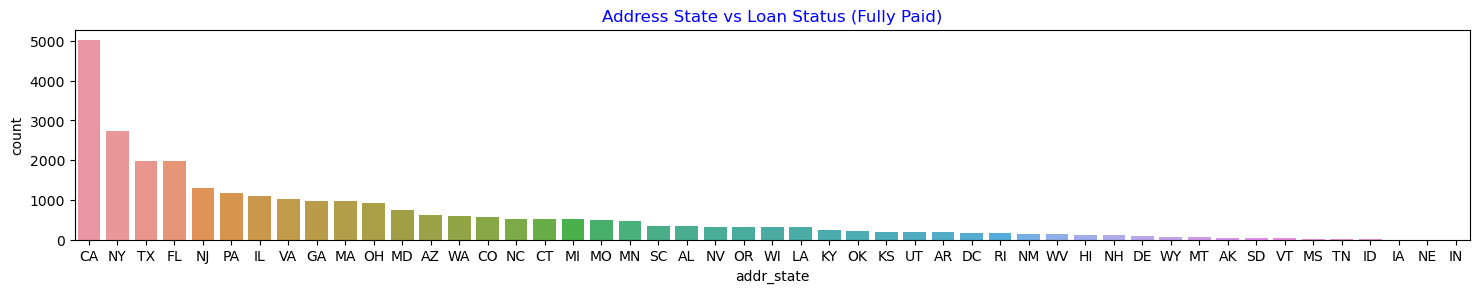

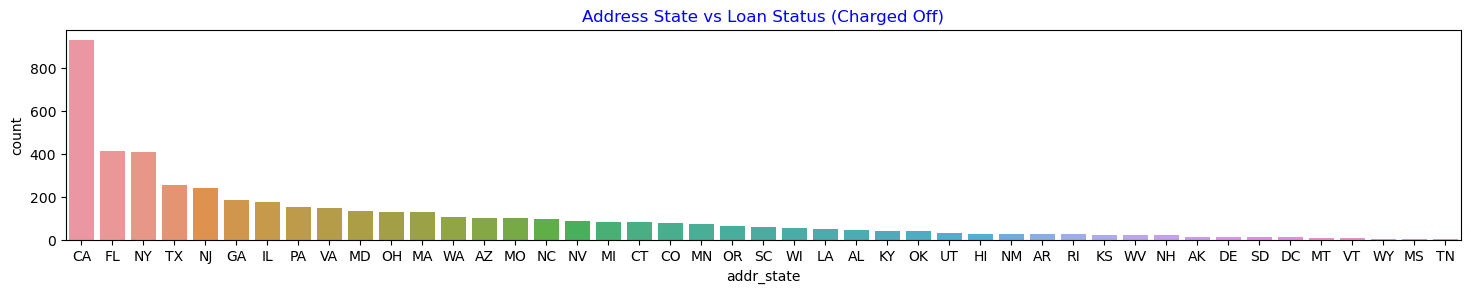

In [81]:
fully_paid_data = loan_df[loan_df.loan_status == 'Fully Paid']
charged_off_data = loan_df[loan_df.loan_status == 'Charged Off']

plt.figure(figsize=(18,6))
plt.subplot(211)
sns.countplot(data=fully_paid_data, x='addr_state', order=fully_paid_data.addr_state.value_counts().index)
plt.title('Address State vs Loan Status (Fully Paid)', fontdict={'fontsize':12, 'color':'blue'})

plt.figure(figsize=(18,6))
plt.subplot(212)
sns.countplot(data=charged_off_data, x='addr_state', order=charged_off_data.addr_state.value_counts().index)
plt.title('Address State vs Loan Status (Charged Off)', fontdict={'fontsize':12, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) Majority of applicants who fully paid the loan belong to states 'CA','NY','TX' and 'FL'.</br>
        2) Majority of applicants who defaulted the loan belong to states 'CA','FL' and 'NY'.
</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">3.6 Purpose</code>

#### `3.6.1 purpose vs loan_amnt`

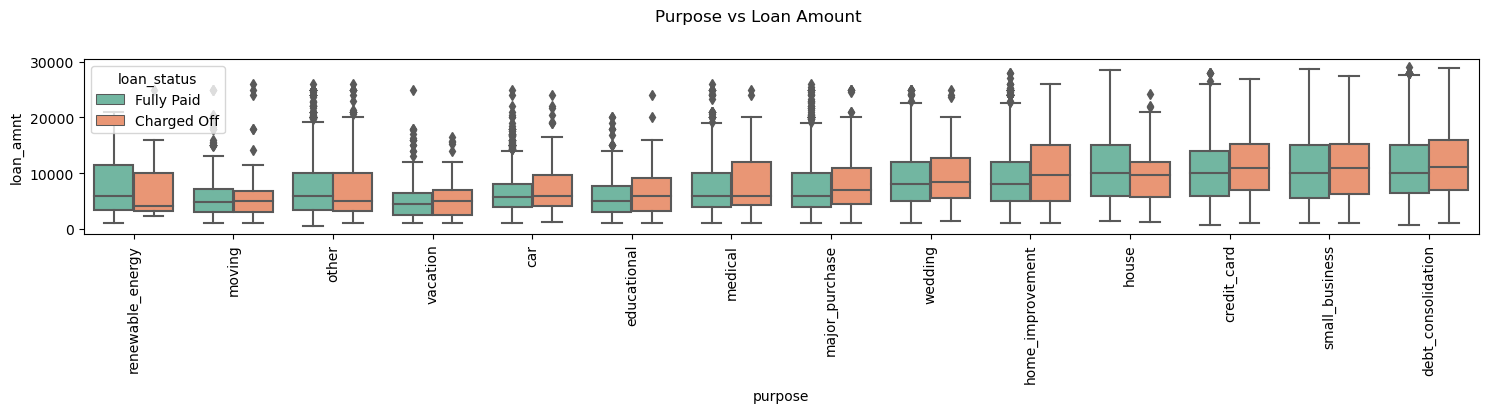

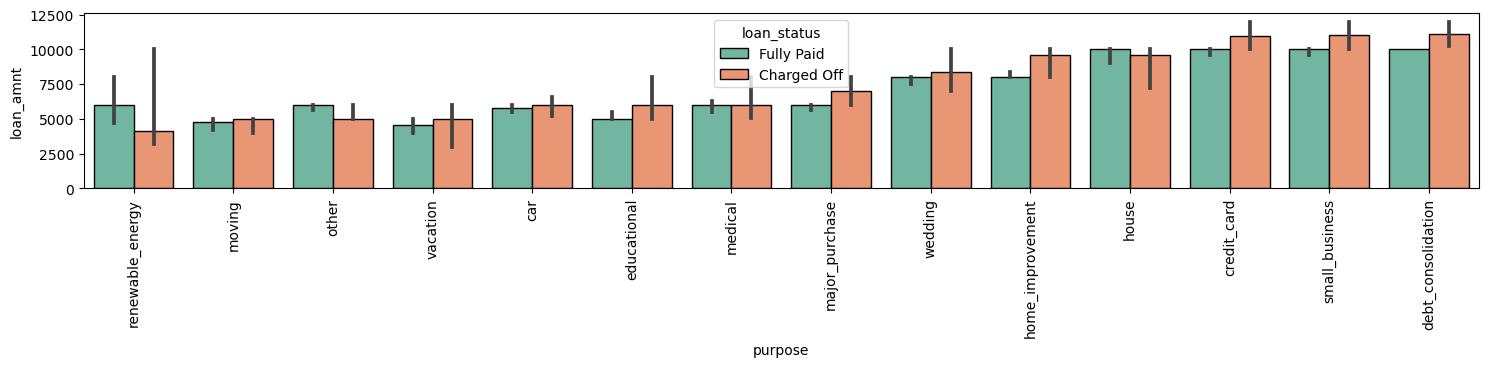

In [82]:
data2 = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.figure(figsize=(18,5))
plt.suptitle('Purpose vs Loan Amount')
plt.subplot(211)
sns.boxplot(data= loan_df, x='purpose', y='loan_amnt', hue='loan_status', 
            order=data2[data2.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose,
           palette='Set2')
plt.xticks(rotation=90)

plt.figure(figsize=(18,5))
plt.subplot(212)
sns.barplot(data= loan_df, x='purpose', y='loan_amnt', hue='loan_status', 
            order=data2[data2.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, 
            estimator=np.median, palette='Set2',edgecolor='black')
plt.xticks(rotation=90)

plt.show()

<div class="alert alert-block alert-success">
    <b>Observation:</br> Applicants requesting higher loan amounts for debt_consolidation, credit_card and small_business purposes have defaulted more.</b>
</div>

#### `3.6.2 purpose vs loan_status (Charged-off)`

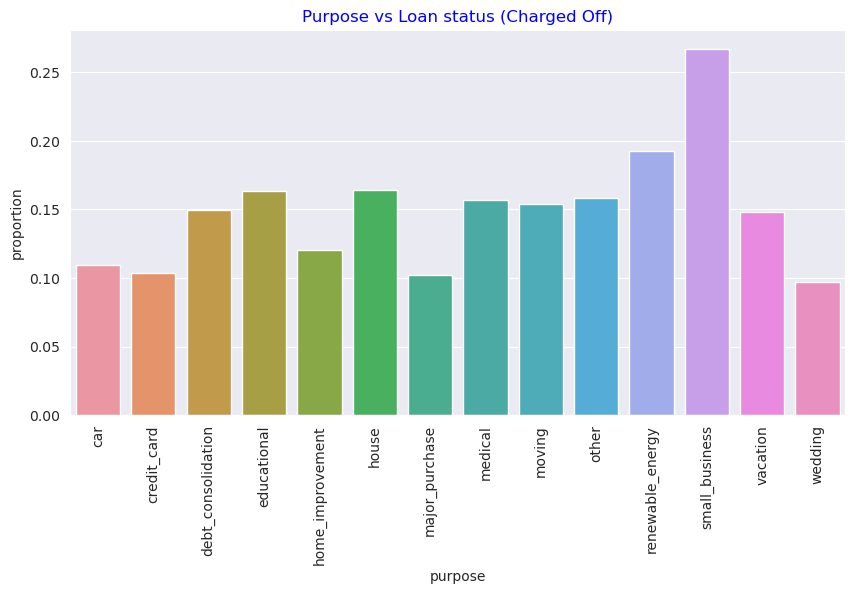

In [83]:
#Finding Proportion of values for each sub-category of 'purpose' field
data3 = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
data3['proportion'] = data3.groupby('purpose')['id'].transform(lambda x: x/x.sum())

data3 = data3[data3.loan_status == 'Charged Off']

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5))
    sns.barplot(data=data3, x='purpose', y='proportion')
    plt.xticks(rotation=90)

plt.title('Purpose vs Loan status (Charged Off)', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Small Business purpose loans have the highest charged-off proportion.</b>
</div>`

#### `3.6.3 purpose vs int_rate`

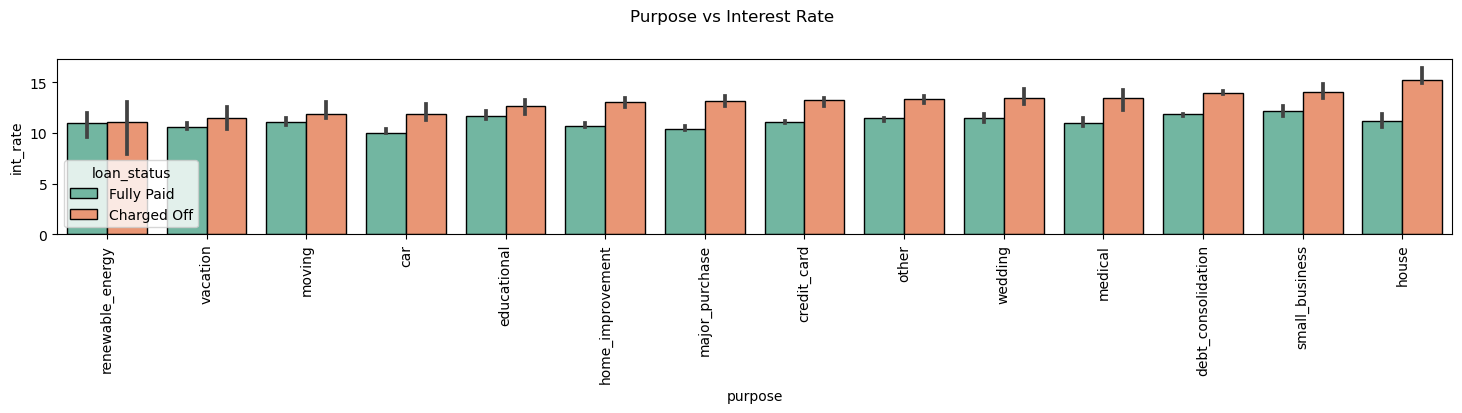

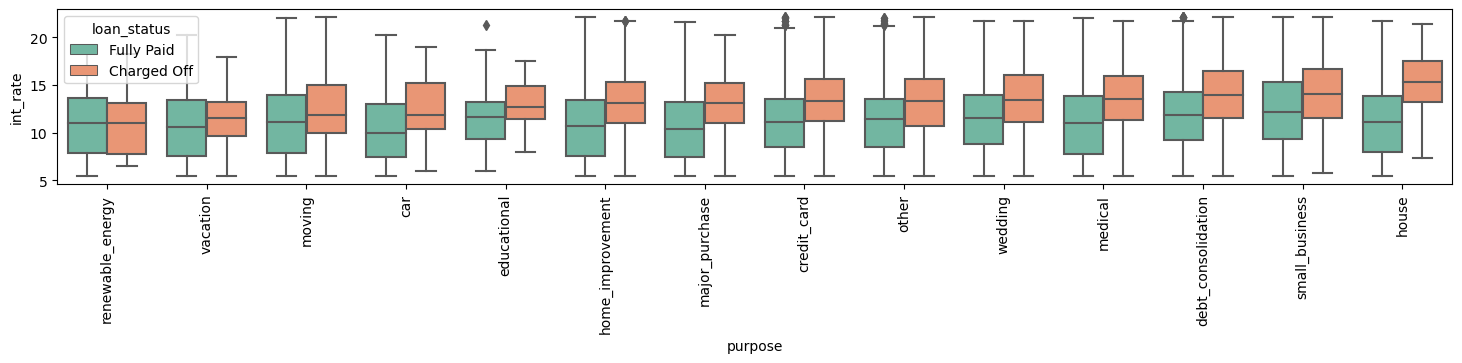

In [84]:
df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_order = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.figure(figsize=(18,5))
plt.suptitle('Purpose vs Interest Rate')
plt.subplot(211)
sns.barplot(data= loan_df, x='purpose', y='int_rate', hue='loan_status', estimator=np.median, 
            order = purpose_order,palette='Set2',edgecolor='black')
plt.xticks(rotation=90)

plt.figure(figsize=(18,5))
plt.subplot(212)
sns.boxplot(data= loan_df, x='purpose', y='int_rate', hue='loan_status', 
            order = purpose_order, palette='Set2')
plt.xticks(rotation=90)

plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Home loans have defaulted the most.</b>
</div>`

### ✏️ <code style="background:lightcyan;color:black">3.7 Verification Status</code>

#### `3.7.1 verification_status vs loan_amnt`

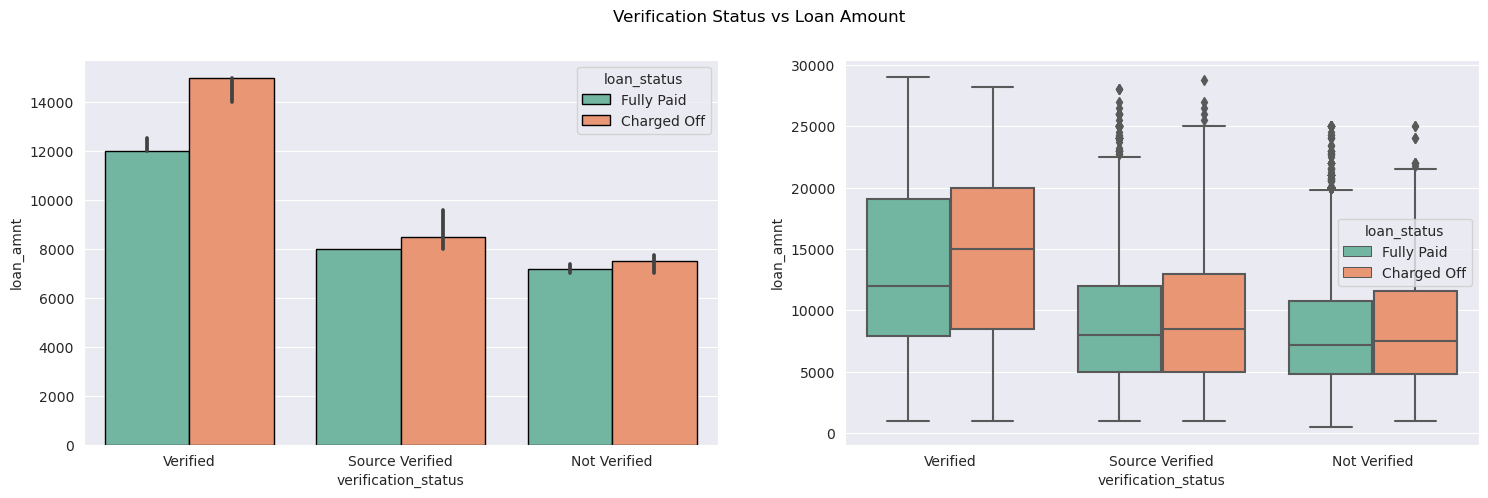

In [85]:
plt.figure(figsize=(18,5))
with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.barplot(data=loan_df, x='verification_status', y='loan_amnt', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='verification_status', y='loan_amnt', hue='loan_status', palette="Set2")

plt.suptitle('Verification Status vs Loan Amount')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: For all the segments of verification_status, higher the loan amount, higher are the chances of default.</b>
</div>`

#### `3.7.2 verification_status vs int_rate`

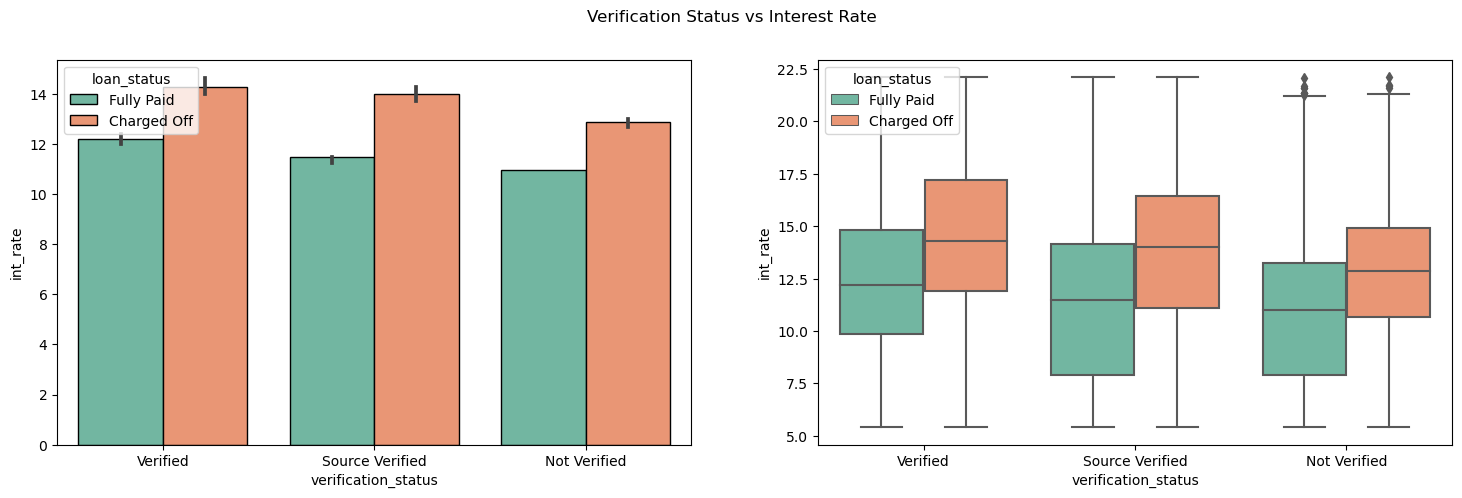

In [86]:
plt.figure(figsize=(18,5))

plt.subplot(121)
sns.barplot(data=loan_df, x='verification_status', y='int_rate', hue='loan_status', estimator=np.median,
           palette='Set2',edgecolor='black')

plt.subplot(122)
sns.boxplot(data=loan_df, x='verification_status', y='int_rate', hue='loan_status',palette='Set2')

plt.suptitle('Verification Status vs Interest Rate')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: Irrespective of verification status, more the interest rate, more are the chances of default.</b>
</div>`

#### `3.7.3 verification_status vs dti`

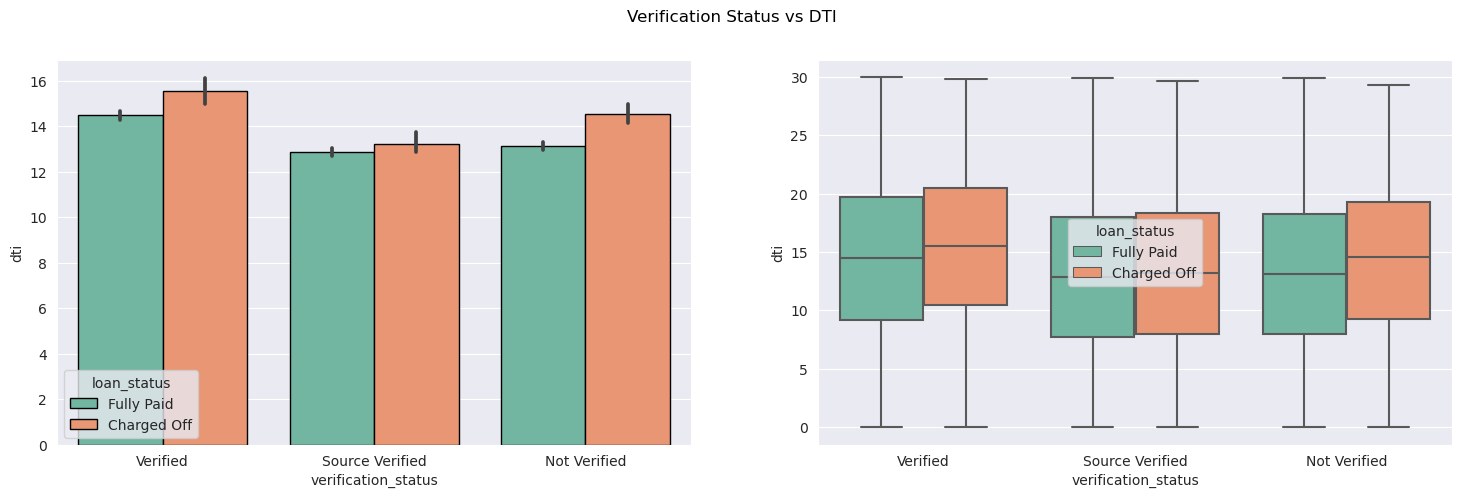

In [87]:
plt.figure(figsize=(18,5))

with sns.axes_style("darkgrid"):
    plt.subplot(121)
    sns.barplot(data=loan_df, x='verification_status', y='dti', hue='loan_status', estimator=np.median,
               palette='Set2',edgecolor='black')

    plt.subplot(122)
    sns.boxplot(data=loan_df, x='verification_status', y='dti', hue='loan_status',palette='Set2')

plt.suptitle('Verification Status vs DTI')
plt.show()

<div class="alert alert-block alert-success">
    <b>Observation: For all the segments of verification_status, higher the dti ratio, higher are the chances of defaulting the loan.</b>
</div>`

***

## 📌 <code style="background:lightyellow;color:black">Bivariate Analysis (Both fields NUMERICAL)</code> 📊

### ✏️ <code style="background:lightcyan;color:black">4.1 Loan Amount vs Annual income</code>

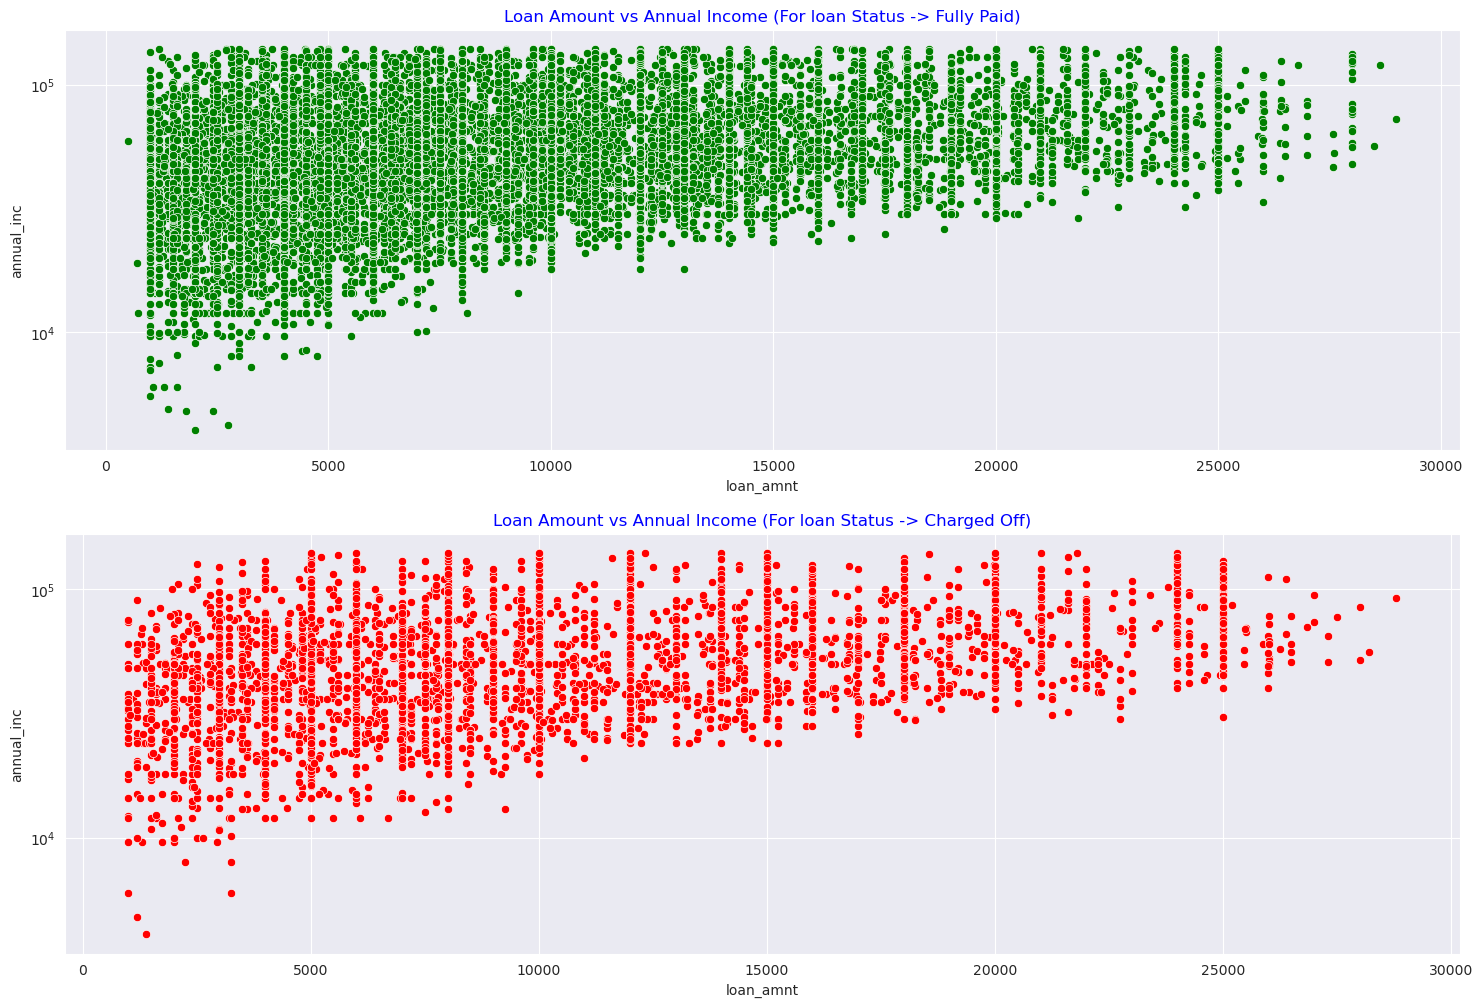

In [88]:
fully_paid_data = loan_df[loan_df.loan_status == 'Fully Paid']
charged_off_data = loan_df[loan_df.loan_status == 'Charged Off']

plt.figure(figsize=(18,12))

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sns.scatterplot(data=fully_paid_data, x='loan_amnt', y='annual_inc', c= 'green')
    plt.yscale('log') #for displaying larger range of annual_inc values on a small scale
    plt.title('Loan Amount vs Annual Income (For loan Status -> Fully Paid)', fontdict={'fontsize':12, 'color':'blue'})

    plt.subplot(212)
    sns.scatterplot(data=charged_off_data, x='loan_amnt', y='annual_inc', c='red')
    plt.yscale('log') #for displaying larger range of annual_inc values on a small scale
    plt.title('Loan Amount vs Annual Income (For loan Status -> Charged Off)', fontdict={'fontsize':12, 'color':'blue'})

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        1) The fully paid chart is more dense compared the charged-off chart showing that, with increase in annual income there is increase in loan amount request, and the borrowers in such cases are likely to fully pay the loan.</br>
</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">4.2 Loan Amount vs Interest Rate</code>

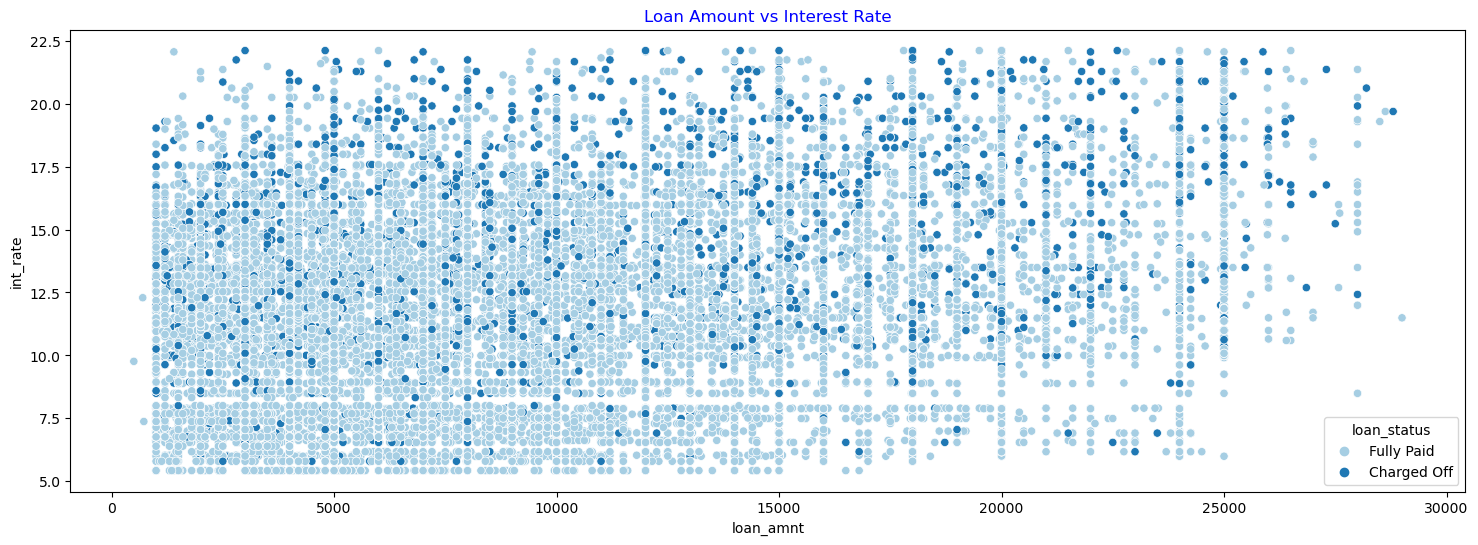

In [89]:
plt.figure(figsize=(18,6))

#scatter plot for finding pattern
sns.scatterplot(data=loan_df, x='loan_amnt', y='int_rate', hue='loan_status', palette="Paired")
plt.title('Loan Amount vs Interest Rate', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations: The data points are very much distributed across the plot; no specific pattern found.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">4.3 Loan Amount vs DTI</code>

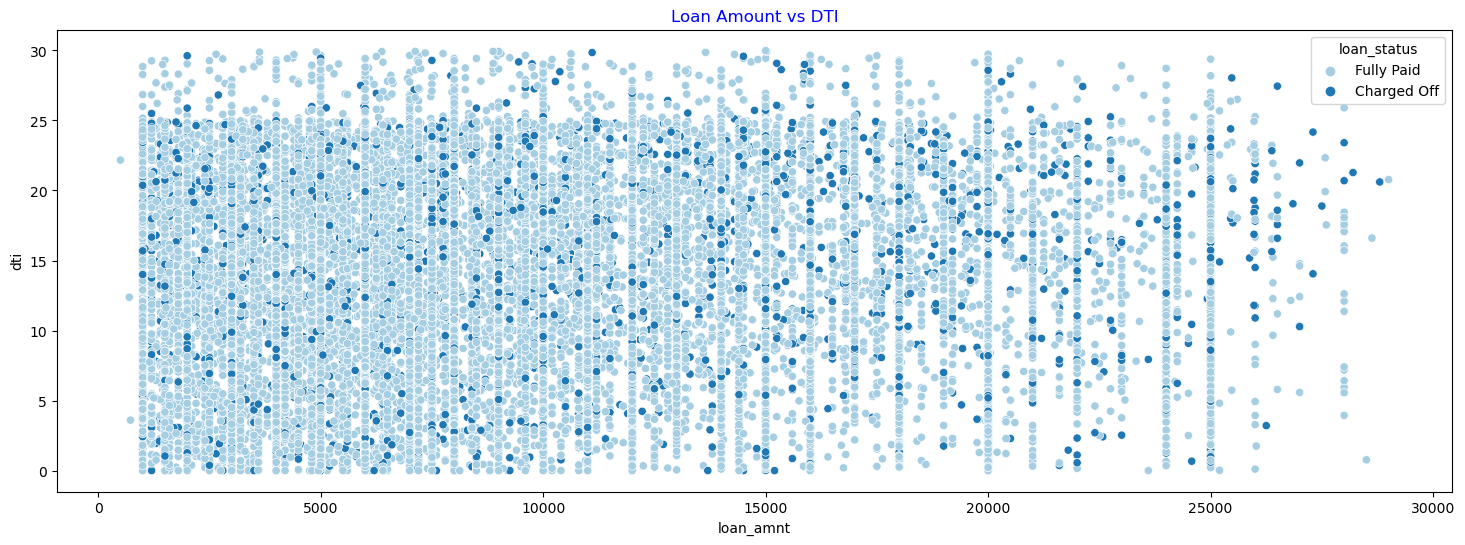

In [90]:
plt.figure(figsize=(18,6))

#scatter plot for finding pattern
sns.scatterplot(data=loan_df, x='loan_amnt', y='dti', hue='loan_status', palette="Paired")
plt.title('Loan Amount vs DTI', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations: The data points are pretty much spread across the plot. There is no specific pattern found.</b>
</div>

### ✏️ <code style="background:lightcyan;color:black">4.4 Interest Rate vs DTI</code>

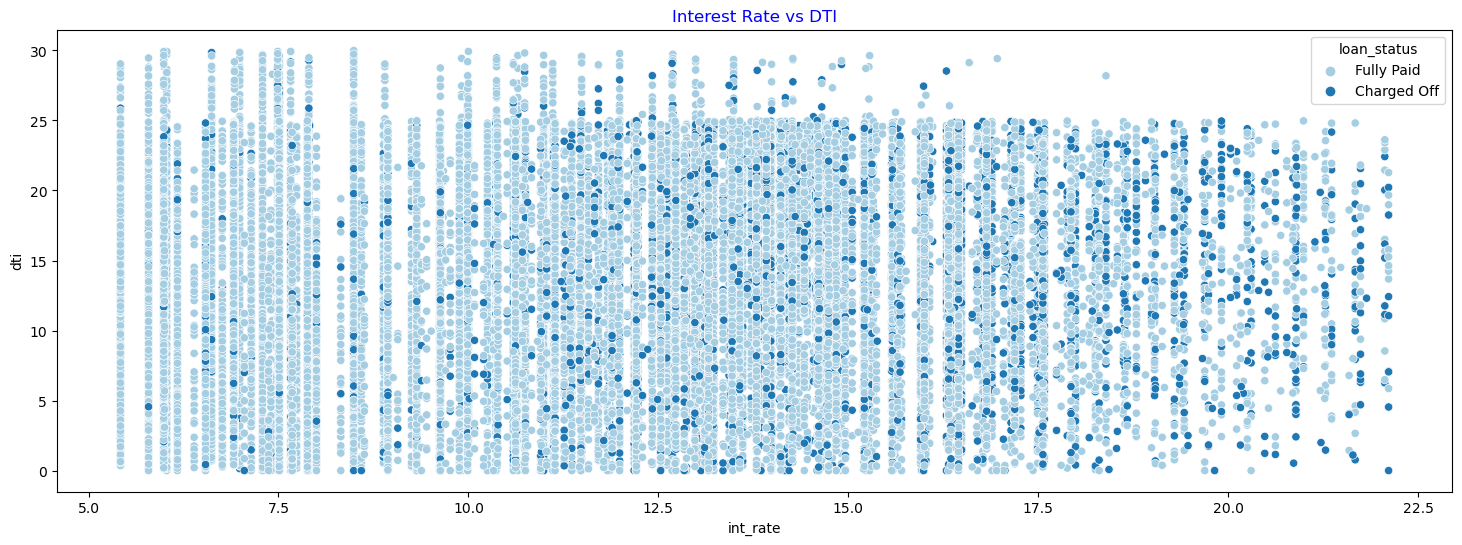

In [91]:
plt.figure(figsize=(18,6))

#scatter plot for finding pattern
sns.scatterplot(data=loan_df, x='int_rate', y='dti', hue='loan_status', palette="Paired")
plt.title('Interest Rate vs DTI', fontdict={'fontsize':12, 'color':'blue'})
plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br> 
        The data points are very much distributed across the plot; but irrespective of DTI, for higher interest loans, charged-off rates are also high.</b>
</div>

***

## 📌 <code style="background:lightyellow;color:black">Multivariate Analysis</code> 📊

### ✏️ <code style="background:lightcyan;color:black">5.1 Correlation Matrix and Heatmap</code>

In [92]:
#Creating the numerical columns list that are not necessary for Correlation Analysis
columns_drop_list = ['installment', 'id', 'issue_year', 'issue_month']

#Dropping those fields for ease of analysis
loan_data_for_correlation = loan_df.drop(columns_drop_list, axis=1)

In [93]:
#Creating a correlation matrix
correlation_matrix = loan_data_for_correlation.corr(numeric_only=True)

#Displaying the correlation matrix
correlation_matrix

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt              1.000000     0.977257         0.942004  0.358909   
funded_amnt            0.977257     1.000000         0.966732  0.340851   
funded_amnt_inv        0.942004     0.966732         1.000000  0.356267   
term                   0.358909     0.340851         0.356267  1.000000   
int_rate               0.232831     0.243684         0.235263  0.422811   
annual_inc             0.337228     0.331921         0.320656  0.064137   
dti                    0.093126     0.093328         0.095859  0.076925   
pub_rec_bankruptcies  -0.017559    -0.017341        -0.022836  0.020673   

                      int_rate  annual_inc       dti  pub_rec_bankruptcies  
loan_amnt             0.232831    0.337228  0.093126             -0.017559  
funded_amnt           0.243684    0.331921  0.093328             -0.017341  
funded_amnt_inv       0.235263    0.320656  0.095859             -0.022836  
term                  0.422811    0.064137  0.076925              0.020673  
int_rate              1.000000    0.004647  0.101807              0.089413  
annual_inc            0.004647    1.000000 -0.086316              0.008908  
dti                   0.101807   -0.086316  1.000000              0.004921  
pub_rec_bankruptcies  0.089413    0.008908  0.004921              1.000000

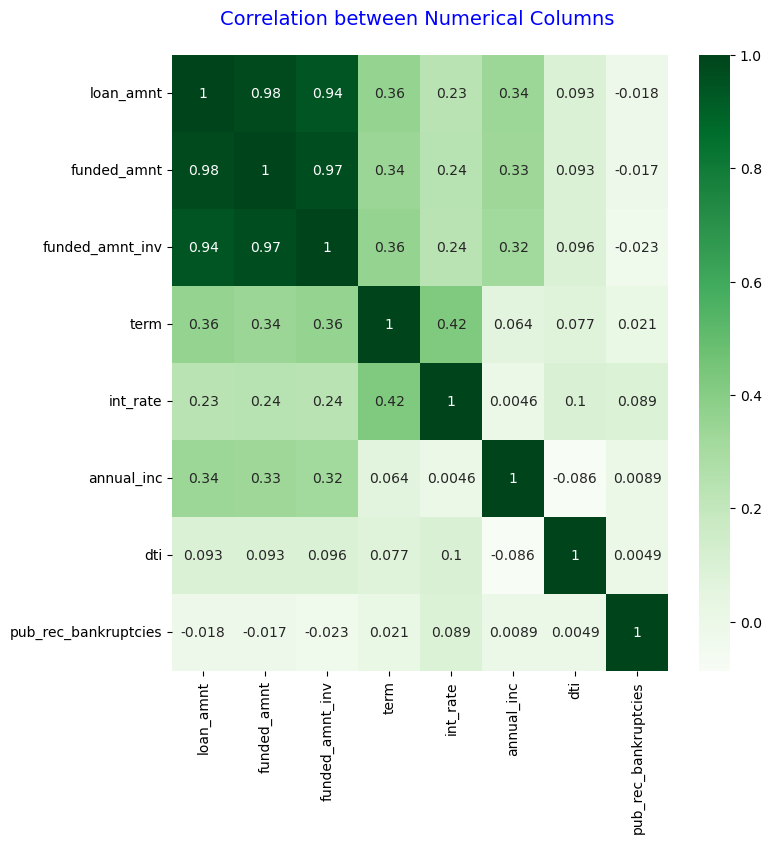

In [94]:
#plotting correlation matrix on a heat map using Seaborn library
plt.figure(figsize=(8,8))
plt.title("Correlation between Numerical Columns \n", fontdict={'fontsize':14, 'color':'blue'})
sns.heatmap(correlation_matrix, annot = True, cmap='Greens')

plt.show()

<div class="alert alert-block alert-success">
    <b>Observations:</br></br>
        1) Strong Correlation:</br>
        - funded_amnt has strong correlation with loan_amnt</br>
        - funded_amnt has strong correlation with funded_amnt_inv</br>
        - loan_amnt has strong correlation with funded_amnt_inv</br></br>
        2) Moderate Correlation:</br>
        - term has moderate correlation with int_rate</br>
        - term has moderate correlation with loan_amnt</br>
        - term has moderate correlation with funded_amnt_inv</br></br>
        3) Negative Correlation:</br>
        - pub_rec_bankrupticies has negative correlation with loan_amnt</br>
        - pub_rec_bankrupticies has negative correlation with funded_amnt</br>
        - dti has negative correlation with annual_inc
</b>
</div>

## 📋 <code style="background:lightyellow;color:black">Conclusions</code>

<div class="alert alert-block alert-info">
    <b> 1) The company should minimize high interest loans of ‘60 months’ tenure as they are more prone to being charged-off.</br></br>
        2) Borrowers from ‘OTHER’ and ‘MORTGAGE’ home ownership status, taking higher loan amount have defaulted more. The company should keep this in mind while approving loans from such type of borrowers.</br></br>
        3) Majority of applicants who defaulted the loan belong to states 'CA', 'FL' and 'NY'. So, the company should reduce the number of loan sanctions to the borrowers, who are from these states, to cut down the amount of credit loss.</br></br>
        4) Loan grades are a good metric for detecting defaulters. As the loan grade decreases (From A to G), the proportion of loan default increases (From A to G). The company should be careful while approving lower graded loans and should do more examination of borrowers applying for such lower graded loans.</br></br>
        5) Small Business purpose loans have the highest charged-off proportion. Company should reduce issuing loans to the borrowers who are taking loans for such purpose.</br></br>
        6) For all the segments of verification_status, higher the dti ratio, higher are the chances of defaulting the loan.</b></br>
</div>